In [1]:
# -*- coding: utf-8 -*-
# -*- author : Vincent Roduit - Yannis Laaroussi - Fabio Palmisano - Vincent Roh - Alexi Semiz -*-
# -*- date : 2023-11-15 -*-
# -*- Last revision: 2023-11-15 -*-
# -*- python version : 3.9.13 -*-
# -*- Description: Main Containing all the meaningfull results -*-

In [2]:
#import libraries
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from copy import deepcopy
from statsmodels.stats import diagnostic
from datetime import datetime
from scipy import stats
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

In [4]:
#import functions
from read.read_functions import *
from read.pickle_functions import *
from create_all_users import create_all_users
from create_rating_statistic import create_ratings_stat

#import cleaning functions
from cleaning_functions.matched_beer import *
from cleaning_functions.rate_beer import *
from cleaning_functions.advocate import *

#import functions for the analysis
from compute_experts import *

---
# Download and save datas
### Data paths

In [5]:
#Data paths for raw files
beer_advocate_path = '../datas/BeerAdvocate/'
matched_beer_data_path = '../datas/matched_beer_data/'
rate_beer_path = '../datas/RateBeer/'

advocate_beers_path = beer_advocate_path + 'beers.csv'
advovate_breweries_path = beer_advocate_path + 'breweries.csv'
advocate_ratings_path = beer_advocate_path + 'ratings.txt'
advocate_reviews_path = beer_advocate_path + 'reviews.txt'
advocate_users_path = beer_advocate_path + 'users.csv'

matched_beer_beers = matched_beer_data_path + 'beers.csv'
matched_beer_breweries = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx = matched_beer_data_path + 'users_approx.csv'
matched_beer_users = matched_beer_data_path + 'users.csv'

rate_beer_beers = rate_beer_path + 'beers.csv'
rate_beer_breweries = rate_beer_path + 'breweries.csv'
rate_beer_users = rate_beer_path + 'users.csv'
rate_beer_ratings = rate_beer_path + 'ratings.txt'
rate_beer_reviews = rate_beer_path + 'reviews.txt'

contries_path = '../datas/countries/countries.csv'


In [6]:
#data paths for pickle files
beer_advocate_path_pickle = '../datas/BeerAdvocate/pickles/df_advocate_'
matched_beer_data_path_pickle = '../datas/matched_beer_data/pickles/df_matched_beer_'
rate_beer_path_pickle = '../datas/RateBeer/pickles/df_rate_beer_'

advocate_beers_path_pickle = beer_advocate_path_pickle + 'beers.pkl'
advovate_breweries_path_pickle = beer_advocate_path_pickle + 'breweries.pkl'
advocate_ratings_path_pickle = beer_advocate_path_pickle + 'ratings.pkl'
advocate_reviews_path_pickle = beer_advocate_path_pickle + 'reviews.pkl'
advocate_users_path_pickle = beer_advocate_path_pickle + 'users.pkl'

matched_beer_beers_pickle = matched_beer_data_path_pickle + 'beers.pkl'
matched_beer_breweries_pickle = matched_beer_data_path_pickle + 'breweries.pkl'
matched_beer_ratings_ba_pickle = matched_beer_data_path_pickle + 'ratings_ba.pkl'
matched_beer_ratings_rb_pickle = matched_beer_data_path_pickle + 'ratings_rb.pkl'
matched_beer_ratings_pickle = matched_beer_data_path_pickle + 'ratings.pkl'
matched_beer_users_approx_pickle = matched_beer_data_path_pickle + 'users_approx.pkl'
matched_beer_users_pickle = matched_beer_data_path_pickle + 'users.csv'

rate_beer_beers_pickle = rate_beer_path_pickle + 'beers.pkl'
rate_beer_breweries_pickle = rate_beer_path_pickle + 'breweries.pkl'
rate_beer_users_pickle = rate_beer_path_pickle + 'users.pkl'
rate_beer_ratings_pickle = rate_beer_path_pickle + 'ratings.pkl'
rate_beer_reviews_pickle = rate_beer_path_pickle + 'reviews.pkl'

In [7]:
#Define list of datas for each website
datas_matched_beer_names = [
    'df_matched_beer_beers',
    'df_matched_beer_breweries',
    'df_matched_beer_ratings_ba',
    'df_matched_beer_ratings_rb',
    'df_matched_beer_ratings',
    'df_matched_beer_users_approx',
    'df_matched_beer_users'
    ]
datas_advocate_names = [
    'df_advocate_beers',
    'df_advocate_breweries',
    'df_advocate_ratings',
    'df_advocate_reviews',
    'df_advocate_users'
    ]
datas_rate_beer_names = [
    'df_rate_beer_beers',
    'df_rate_beer_breweries',
    'df_rate_beer_users',
    'df_rate_beer_ratings'
    #'df_rate_beer_reviews'
    ]

## import datas
### Raw Format
$\color{Red}{\text{Attention}}$ : Run the celluls in this section only if the datasets stored as pickle are not available.

In [ ]:
#import datas from Advovate Beer
df_advocate_beers = pd.read_csv(advocate_beers_path, sep=',')
df_advocate_breweries = pd.read_csv(advovate_breweries_path, sep=',')
df_advocate_ratings = read_txt(advocate_ratings_path)
df_advocate_reviews = read_txt(advocate_reviews_path)
df_advocate_users = pd.read_csv(advocate_users_path, sep=',')

In [ ]:
#import datas from Matched Beer
df_matched_beer_beers = pd.read_csv(matched_beer_beers, sep=',')
df_matched_beer_breweries = pd.read_csv(matched_beer_breweries, sep=',')
df_matched_beer_ratings_ba = read_txt(matched_beer_ratings_ba)
df_matched_beer_ratings_rb = read_txt(matched_beer_ratings_rb)
df_matched_beer_ratings = pd.read_csv(matched_beer_ratings, sep=',')
df_matched_beer_users_approx = pd.read_csv(matched_beer_users_approx)
df_matched_beer_users = pd.read_csv(matched_beer_users)

In [ ]:
#import datas from Rate Beer
df_rate_beer_beers = pd.read_csv(rate_beer_beers, sep=',')
df_rate_beer_breweries = pd.read_csv(rate_beer_breweries, sep=',')
df_rate_beer_users = pd.read_csv(rate_beer_users, sep=',')
df_rate_beer_ratings = read_txt(rate_beer_ratings)
df_rate_beer_reviews = read_txt(rate_beer_reviews)

### Pickle Format

!!!! rb reviews to be add

In [8]:
#import raw data sets
df_matched_beer_beers, df_matched_beer_breweries, df_matched_beer_ratings_ba, df_matched_beer_ratings_rb, df_matched_beer_ratings, df_matched_beer_users_approx, df_matched_beer_users = load_datas('matched_beer_data', datas_matched_beer_names)
df_advocate_beers, df_advocate_breweries, df_advocate_ratings, df_advocate_reviews, df_advocate_users = load_datas('BeerAdvocate', datas_advocate_names)
df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users,df_rate_beer_ratings = load_datas('RateBeer', datas_rate_beer_names)

Loading df_matched_beer_beers...
Loading df_matched_beer_breweries...
Loading df_matched_beer_ratings_ba...
Loading df_matched_beer_ratings_rb...
Loading df_matched_beer_ratings...
Loading df_matched_beer_users_approx...
Loading df_matched_beer_users...
Loading df_advocate_beers...
Loading df_advocate_breweries...
Loading df_advocate_ratings...
Loading df_advocate_reviews...
Loading df_advocate_users...
Loading df_rate_beer_beers...
Loading df_rate_beer_breweries...
Loading df_rate_beer_users...
Loading df_rate_beer_ratings...


## Store dataFrame (Pickle format)
Use this section to store the datasets in pickle (normally done once)

In [ ]:
#define list of datas for each website
datas_rate_beer = [df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users,df_rate_beer_ratings,df_rate_beer_reviews]
datas_matched_beer = [df_matched_beer_beers,df_matched_beer_breweries,df_matched_beer_ratings_ba,df_matched_beer_ratings_rb,df_matched_beer_ratings,df_matched_beer_users_approx,df_matched_beer_users]
datas_advocate_beer = [df_advocate_beers,df_advocate_breweries,df_advocate_ratings,df_advocate_reviews,df_advocate_users]

In [ ]:
#Saving datas
save_datas('RateBeer', datas_rate_beer,datas_rate_beer_names)
save_datas('matched_beer_data', datas_matched_beer,datas_matched_beer_names)
save_datas('BeerAdvocate', datas_advocate_beer,datas_advocate_names)

---
# Initial data analysis
## 0. Preprocessing datasets

In [11]:
# Clean datasets
df_matched_beer_users, df_matched_beer_users_index = clean_mb_users(df_matched_beer_users)
df_advocate_users = clean_advocate_users(df_advocate_users)
df_rate_beer_users = clean_rb_users(df_rate_beer_users)
df_advocate_ratings = clean_advocate_ratings(df_advocate_ratings)
df_rate_beer_ratings = clean_rb_ratings(df_rate_beer_ratings)

*  A first merge is performed on user's datasets in order to have a single dataFrame. 
* Another merge is performed on ratings (for both Advocate and Rate Beer) to obtain a single dataFrame

In [9]:
load_pickle = True
if load_pickle:
    merge_path= '../datas/merged/'
    with open(merge_path+"df_ratings_stat.pkl", "rb") as f:
        df_ratings_stats = pickle.load(f)
    with open(merge_path+"df_all_users.pkl", "rb") as f:
        df_all_users = pickle.load(f)
else:
    df_all_users = create_all_users(df_matched_beer_users,df_advocate_users,df_rate_beer_users)
    df_ratings_stats = create_ratings_stat(df_matched_beer_ratings,df_advocate_ratings,df_rate_beer_ratings)

## 1 Diving in the datas
### 1.1 Distribution of the number of ratings per user

In [15]:
ratings_per_user = pd.DataFrame({'nbr_ratings':df_ratings_stats.groupby('user_id')['user_id'].count()})

In [16]:
ratings_per_user.describe()

,nbr_ratings
count,220796.000000
mean,66.594748
std,429.733452
min,1.000000
25%,1.000000
50%,3.000000
75%,13.000000
max,43251.000000


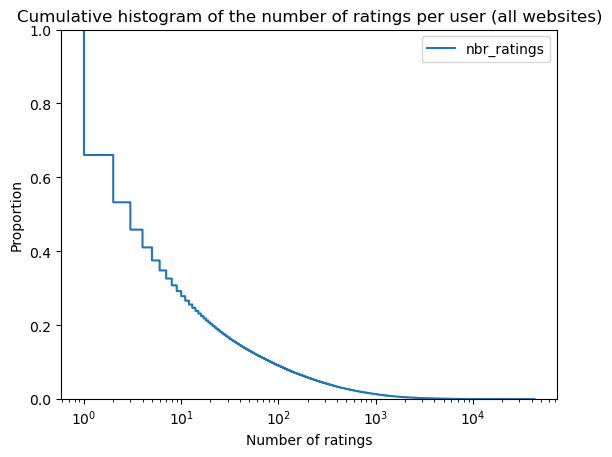

In [17]:
sns.ecdfplot(ratings_per_user, label="nbr_ratings", complementary=True)
plt.title('Cumulative histogram of the number of ratings per user (all websites)')
plt.xlabel('Number of ratings')
plt.ylabel('Proportion')
plt.semilogx()
plt.show()

The distribution has a heavy tail, indicating that there are numerous users who have posted only a few ratings, and conversely, a small number of users who are prolific raters. This observation motivates us to delve deeper into understanding the distinctions between these prolific raters and the rest of the user population.

#### 1.1.a) Define who is a massive rater 
In order to separate people in two group, a definition of a massive rater, called from now an "expert" has to be found. The choice was made here to consider the number of ratings per year and aggregate scores from the past 3 years with the formula:
$$
R_{Y_j} = 2 * R_{Y_{j}} + 0.5 * R_{Y_{j-1}} + 0.25 * R_{Y_{j-2}} + 0.1 * R_{Y_{j-3}}
$$
, where $R_{Y_j}$ denotes the number of ratings for the year j.
The experts are then people from the 0.995 quantile of the score calculate previously (among those who have a non-zero score i.e active users).

In [10]:
#define the expert users
df_ratings_stat_expert, df_ratings_stat_pivot = compute_experts_table(df_ratings_stats)
df_ratings_stat_expert.head()

,user_id,year,nb_ratings,is_expert
0,2,2000,44,False
1,2,2001,4,False
2,2,2002,1,False
3,3,2000,94,False
4,3,2001,69,False


In [ ]:
experts_dict = {}
for year in range(1996, 2018):
    experts_dict[year] = df_ratings_stat_expert.loc[(df_ratings_stat_expert["year"] == year) & (df_ratings_stat_expert["is_expert"] == 1)].user_id.values.tolist()
print(experts_dict)

In [ ]:
df_ratings_stats["is_expert"]=df_ratings_stats[["user_id","year"]].apply(lambda x: 1 if x["user_id"] in experts_dict[x["year"]] else 0,axis=1)

In [63]:
df_expert_per_year = df_ratings_stat_expert.groupby('year').apply(lambda x: sum(x['is_expert']))

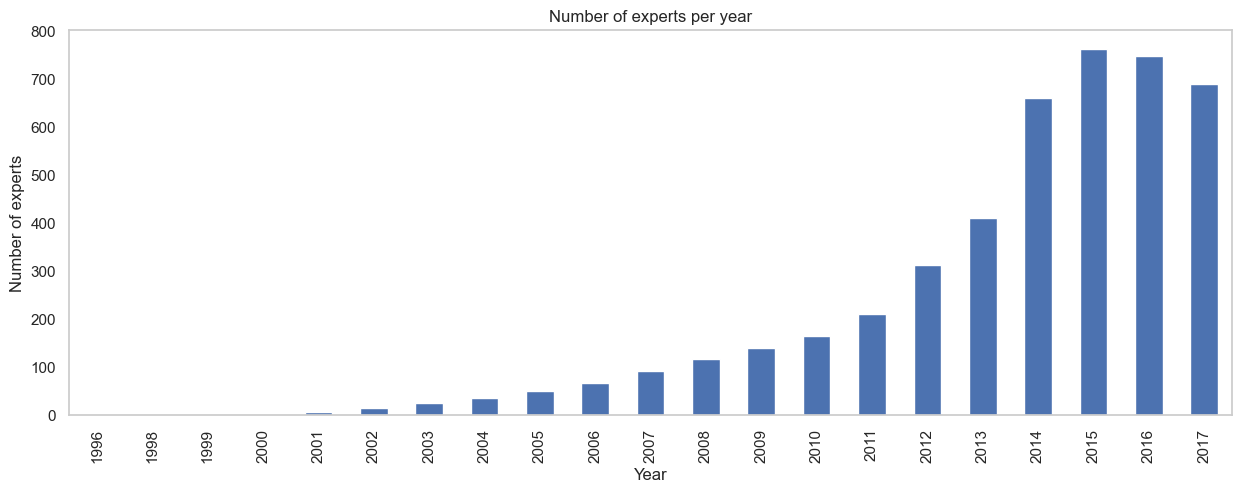

In [70]:
df_expert_per_year.plot(kind='bar', figsize=(15,5))
plt.ylabel('Number of experts')
plt.xlabel('Year')
plt.title('Number of experts per year')
plt.grid(False)


### 1.2. Analysis of the behavior of the two categories
#### 1.2.a) Mean of the ratings

The purpose of this section is to analyze if the experts are more severe than the rest of the population on the global rating (column 'rating' in the DataFrame).

In [20]:
avg_ratings_expert = []
avg_ratings_normal = []
ttest_expert_normal = []

interest_years = sorted([year for year in df_ratings_stats.year.unique() if year > 2002])

for year in interest_years:
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_ratings_stat_year = df_ratings_stats.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_id
    avg_expert = df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'].mean()
    avg_normal = df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'].mean()
    ttest = stats.ttest_ind(df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'], df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]['rating'])
    ttest_expert_normal.append(ttest)
    avg_ratings_expert.append(avg_expert)
    avg_ratings_normal.append(avg_normal)

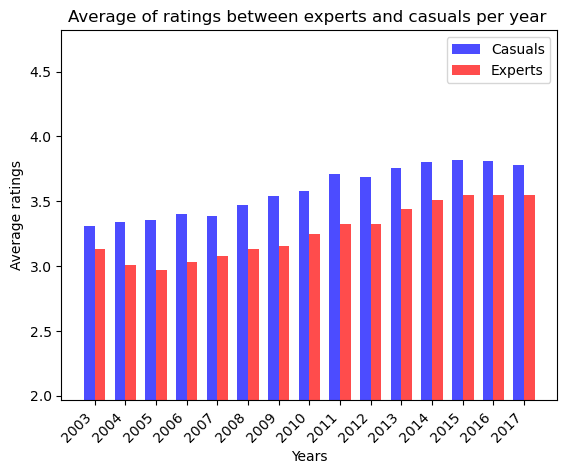

In [21]:
bar_width = 0.35
fig, ax = plt.subplots()

bar_positions1 = np.arange(len(avg_ratings_expert))
bar_positions2 = bar_positions1 + bar_width

ax.bar(bar_positions1, avg_ratings_normal, width=bar_width, label='Casuals', color='blue', alpha=0.7)
ax.bar(bar_positions2, avg_ratings_expert, width=bar_width, label='Experts', color='red', alpha=0.7)

ax.set_xlabel('Years')
ax.set_ylabel('Average ratings')
ax.set_title('Average of ratings between experts and casuals per year ')
ax.set_xticks(bar_positions1 + bar_width / 2)
ax.set_xticklabels(interest_years, rotation=45, ha='right')

y_min = min(min(avg_ratings_normal), min(avg_ratings_expert)) - 1 
y_max = max(max(avg_ratings_normal), max(avg_ratings_expert)) + 1 
ax.set_ylim(y_min, y_max)
ax.legend()

plt.show()

From this graph it is clear that the expert are more severe, but let's verify with the mean of a T-Test.

In [22]:
for year in range(len(ttest_expert_normal)):
    if ttest_expert_normal[year][1] < 0.05:
        print(f'The p-value for the year {interest_years[year]} is {ttest_expert_normal[year][1]:.2e}')

The p-value for the year 2003 is 3.56e-157
The p-value for the year 2004 is 0.00e+00
The p-value for the year 2005 is 0.00e+00
The p-value for the year 2006 is 0.00e+00
The p-value for the year 2007 is 0.00e+00
The p-value for the year 2008 is 0.00e+00
The p-value for the year 2009 is 0.00e+00
The p-value for the year 2010 is 0.00e+00
The p-value for the year 2011 is 0.00e+00
The p-value for the year 2012 is 0.00e+00
The p-value for the year 2013 is 0.00e+00
The p-value for the year 2014 is 0.00e+00
The p-value for the year 2015 is 0.00e+00
The p-value for the year 2016 is 0.00e+00
The p-value for the year 2017 is 0.00e+00


The t-test tells that the hypothesis H0, under which the mean for the two groups are equals, can be rejected.

#### 1.2.b) Top 10 rated beers

Now, the assessment focuses on whether experts and the general population share similar preferences when it comes to rating beers. For this investigation, the beers are sorted based on the number of times they were rated. A comparison is then made between the top 10 beers for the two groups.

In [23]:
df_top_10_experts = pd.DataFrame()
df_top_10_rest = pd.DataFrame()

interest_years = sorted([year for year in df_ratings_stats.year.unique() if year > 2002])

for year in interest_years:
    top_10_rest = []
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_ratings_stat_year = df_ratings_stats.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_id
    top_10_rest = df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)].copy()
    top_10_rest = top_10_rest.groupby('beer_id').agg({'rating': 'count', 'beer_name': 'first'})
    top_10_rest = top_10_rest.sort_values(by='rating', ascending=False).head(10)

    df_top_10_rest[f'{year}'] = top_10_rest['beer_name'].values
    top_10_experts = df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)].copy()
    top_10_experts = top_10_experts.groupby('beer_id').agg({'rating': 'count', 'beer_name': 'first'})
    top_10_experts = top_10_experts.sort_values(by='rating', ascending=False).head(10)
    df_top_10_experts[f'{year}'] = top_10_experts['beer_name'].values

In [24]:
similarity = {}
for col in df_top_10_experts.columns:
    value = df_top_10_experts[col].isin(df_top_10_rest[col]).sum()
    similarity[col] = value

In [25]:
for key in similarity:
    if similarity[key] > 0:
        print(f'Year {key} has {similarity[key]} beer(s) in common')
        common_beers = df_top_10_experts[df_top_10_experts[key].isin(df_top_10_rest[key])][key].values
        print(common_beers)

Year 2003 has 1 beer(s) in common
['Ayinger Bräu Weisse']
Year 2012 has 1 beer(s) in common
['Sierra Nevada Ruthless Rye IPA']
Year 2013 has 1 beer(s) in common
['Stone Enjoy By IPA']
Year 2015 has 3 beer(s) in common
["Not Your Father's Root Beer (5.9%)" 'Hop Hunter' 'Grapefruit Sculpin']
Year 2016 has 5 beer(s) in common
['Pineapple Sculpin' 'Otra Vez' 'Citradelic Tangerine IPA'
 'Stone Enjoy By Unfiltered IPA' 'nan']
Year 2017 has 3 beer(s) in common
['Frootwood' 'Stone Ripper' 'Tropical Torpedo Tropical IPA']


In [26]:
top_10_experts

,rating,beer_name
beer_id,,
253963,127,Frootwood
454116,117,Omnipollo Selassie
269906,116,nan
473097,109,Lervig Tasty Juice
241048,105,Stone Ripper
251571,104,Tropical Torpedo Tropical IPA
448710,100,Stigbergets Amazing Haze
270378,97,nan
480912,96,Prairie / Evil Twin Bible Belt - Barrel Aged


In [27]:
df_matched_beer_beers[['style','style.1']]

,style,style.1
0,English Pale Ale,Golden Ale/Blond Ale
1,English Pale Ale,Irish Ale
2,English Bitter,Bitter
3,American Pale Wheat Ale,Amber Ale
4,Irish Dry Stout,Mild Ale
...,...,...
45635,English Pale Ale,India Pale Ale (IPA)
45636,American Blonde Ale,Golden Ale/Blond Ale
45637,Irish Red Ale,Irish Ale
45638,Hefeweizen,German Hefeweizen


#### 1.2.c) We are going to see what kind (in terms of popularity) beer casuals and expert rate

For each rating, we copute the number of ratings done the previos year on this beer, it gives an idea of the populariity of the beer rated

In [54]:
df_grouped_beer_year=df_ratings_stats.groupby(["beer_id","year"]).agg("size").reset_index(name="count")

In [55]:
df_grouped_beer_year_shifted = df_grouped_beer_year.copy()
df_grouped_beer_year_shifted['year'] += 1
df_grouped_beer_year_shifted.rename(columns={"count": "count_last_year"}, inplace=True)
df_ratings_stats = df_ratings_stats.merge(df_grouped_beer_year_shifted, how='left', on=['beer_id', 'year'])
df_ratings_stats.fillna(0, inplace=True)



Let's analyse data from year 2016

In [119]:
df_ratings_this_year,experts_this_year=filter_year_and_add_is_expert(df_ratings_stats,2016,df_ratings_stat_expert)

c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


In [122]:
nbr_ratings_year_minus1_experts=df_ratings_this_year.loc[df_ratings_this_year["is_expert"]==1]["count_last_year"]
nbr_ratings_year_minus1_non_experts=df_ratings_this_year.loc[df_ratings_this_year["is_expert"]==0]["count_last_year"]


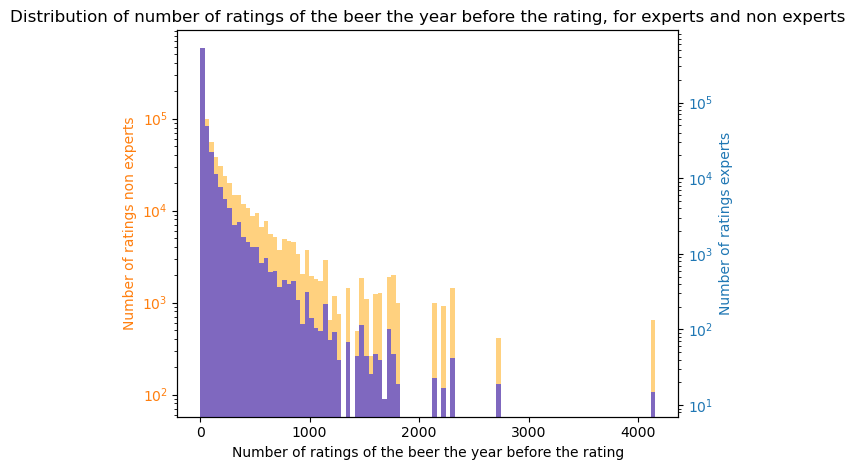

In [123]:
fig, ax1 = plt.subplots()


color = 'tab:orange'
ax1.set_xlabel('Number of ratings of the beer the year before the rating')
ax1.set_ylabel('Number of ratings non experts', color=color)
ax1.hist(nbr_ratings_year_minus1_non_experts, bins=100, log=True, alpha=0.5, color="orange", label="Non experts")
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()


color = 'tab:blue'
ax2.set_ylabel('Number of ratings experts', color=color)
ax2.hist(nbr_ratings_year_minus1_experts, bins=100, log=True, alpha=0.5, color="b", label="Experts")
ax2.tick_params(axis='y', labelcolor=color)


plt.title("Distribution of number of ratings of the beer the year before the rating, for experts and non experts")
fig.tight_layout()
plt.show()

We clearly see that experts rate less popular beers, let's perform a ttest to check this assumption

In [124]:
from scipy.stats import ttest_ind

In [125]:
ttest_ind(nbr_ratings_year_minus1_experts,nbr_ratings_year_minus1_non_experts)

TtestResult(statistic=-269.76152924603286, pvalue=0.0, df=1647988.0)

What if we group the reults by user and use the mean this time :

In [126]:
mean_nbr_ratings_years_minus_one_per_user=df_ratings_this_year.groupby(["user_id","is_expert"])["count_last_year"].agg("mean").reset_index().set_index("user_id")

In [131]:
mean_nbr_ratings_years_minus_one_per_user_experts=mean_nbr_ratings_years_minus_one_per_user.loc[mean_nbr_ratings_years_minus_one_per_user["is_expert"]==1]["count_last_year"]
mean_nbr_ratings_years_minus_one_per_user_non_experts=mean_nbr_ratings_years_minus_one_per_user.loc[mean_nbr_ratings_years_minus_one_per_user["is_expert"]==0]["count_last_year"]

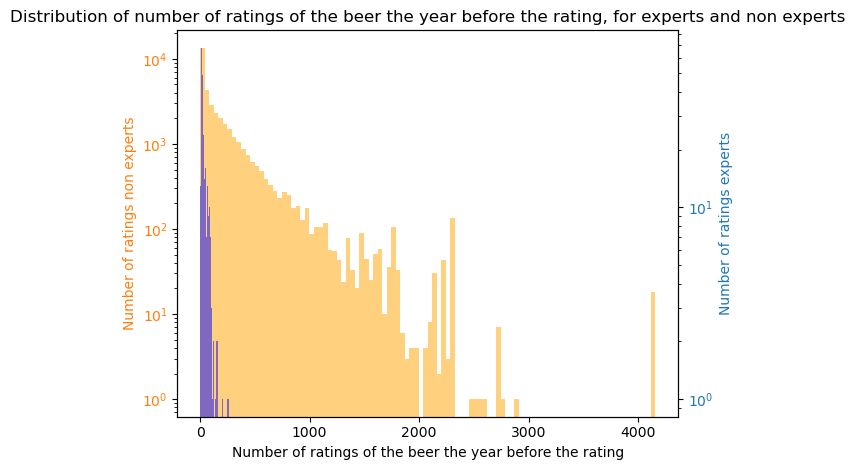

In [133]:
fig, ax1 = plt.subplots()


color = 'tab:orange'
ax1.set_xlabel('Number of ratings of the beer the year before the rating')
ax1.set_ylabel('Number of ratings non experts', color=color)
ax1.hist(mean_nbr_ratings_years_minus_one_per_user_non_experts, bins=100, log=True, alpha=0.5, color="orange", label="Non experts")
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()


color = 'tab:blue'
ax2.set_ylabel('Number of ratings experts', color=color)
ax2.hist(mean_nbr_ratings_years_minus_one_per_user_experts, bins=100, log=True, alpha=0.5, color="b", label="Experts")
ax2.tick_params(axis='y', labelcolor=color)


plt.title("Distribution of number of ratings of the beer the year before the rating, for experts and non experts")
fig.tight_layout()
plt.show()

Here it is even more obvious, the  ttest will confirm what we see

In [134]:
ttest_ind(mean_nbr_ratings_years_minus_one_per_user_experts,mean_nbr_ratings_years_minus_one_per_user_non_experts)

TtestResult(statistic=-14.378290360603048, pvalue=9.374632568129949e-47, df=38334.0)

### 1.2.d) Analysis on the beers styles rated by experts and casuals

In [ ]:
df_ratings_stats['style'] =  df_ratings_stats['style'].str.replace(r'^Saké.*', 'Saké', regex=True) #Saké have multiple styles, we just want to take one style for every saké

In [ ]:
style_count = df_ratings_stats.groupby(['style']).count()

In [ ]:
ratings_per_style = df_ratings_stats.groupby('style').size().reset_index(name='rating_count')


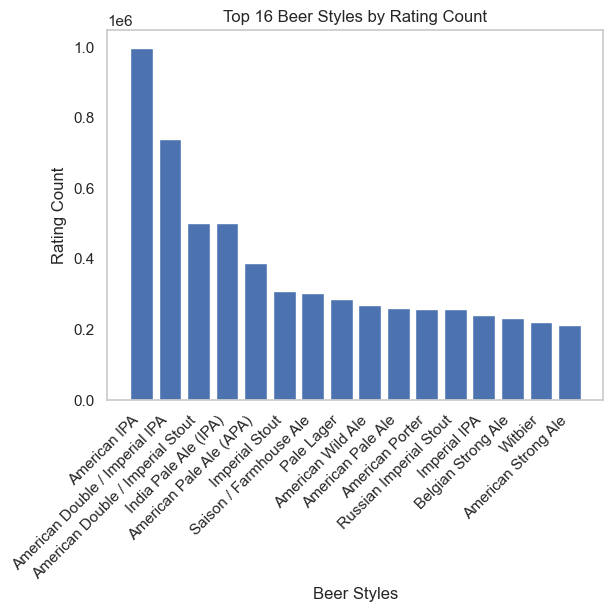

In [ ]:
sorted_ratings = ratings_per_style.sort_values(by='rating_count', ascending=False)

top_16_styles = sorted_ratings.head(16)
top_16 = top_16_styles['style'].unique()

plt.bar(sorted_ratings['style'].head(16), sorted_ratings['rating_count'].head(16))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Beer Styles')
plt.ylabel('Rating Count')
plt.title('Top 16 Beer Styles by Rating Count')
plt.grid(False)
plt.show()


Now let see the evolution over time

In [ ]:
df_stats_per_year = df_ratings_stats.groupby(['style', 'year']).size().reset_index(name='nb_ratings')


In [ ]:
df_styles_peryear_pivot = df_stats_per_year.pivot(index='style', columns='year', values='nb_ratings')
df_styles_peryear_pivot.fillna(0, inplace=True)

In [ ]:

df_top_16 = df_styles_peryear_pivot.loc[top_16]
df_top_16

year,1996,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
style,,,,,,,,,,,,,,,,,,,,,
American IPA,0.0,5.0,5.0,6.0,79.0,790.0,2385.0,3647.0,4529.0,7219.0,...,14013.0,19174.0,22490.0,45428.0,84333.0,139910.0,231492.0,188020.0,150022.0,75585.0
American Double / Imperial IPA,0.0,0.0,0.0,1.0,7.0,151.0,692.0,1467.0,2265.0,4932.0,...,9646.0,14819.0,17983.0,38088.0,65599.0,119661.0,178537.0,124095.0,101050.0,54539.0
American Double / Imperial Stout,0.0,1.0,0.0,0.0,10.0,121.0,327.0,461.0,863.0,1686.0,...,5923.0,8528.0,12191.0,26495.0,39427.0,77157.0,119370.0,95988.0,75213.0,34263.0
India Pale Ale (IPA),0.0,0.0,0.0,61.0,376.0,1982.0,3312.0,6115.0,8524.0,11078.0,...,16961.0,18580.0,20759.0,25129.0,36782.0,51518.0,66283.0,77811.0,82889.0,56170.0
American Pale Ale (APA),1.0,11.0,6.0,7.0,94.0,1047.0,2311.0,2710.0,3278.0,4396.0,...,6715.0,7892.0,9438.0,18808.0,35092.0,56821.0,91150.0,67278.0,52270.0,23888.0
Imperial Stout,0.0,0.0,0.0,19.0,155.0,863.0,1860.0,3482.0,5358.0,6739.0,...,13830.0,15656.0,16165.0,18032.0,24559.0,33004.0,38291.0,41807.0,44876.0,31931.0
Saison / Farmhouse Ale,0.0,0.0,1.0,0.0,5.0,99.0,369.0,664.0,1305.0,1927.0,...,3225.0,4676.0,6981.0,14030.0,24709.0,47845.0,75413.0,60980.0,41158.0,16581.0
Pale Lager,0.0,0.0,0.0,379.0,3845.0,12755.0,12868.0,15123.0,16689.0,17789.0,...,21496.0,18747.0,15388.0,16752.0,21043.0,22069.0,22384.0,20052.0,16335.0,10350.0
American Wild Ale,0.0,0.0,0.0,0.0,0.0,0.0,8.0,38.0,197.0,294.0,...,1488.0,2636.0,4739.0,11882.0,17819.0,35762.0,68253.0,60715.0,45071.0,19735.0


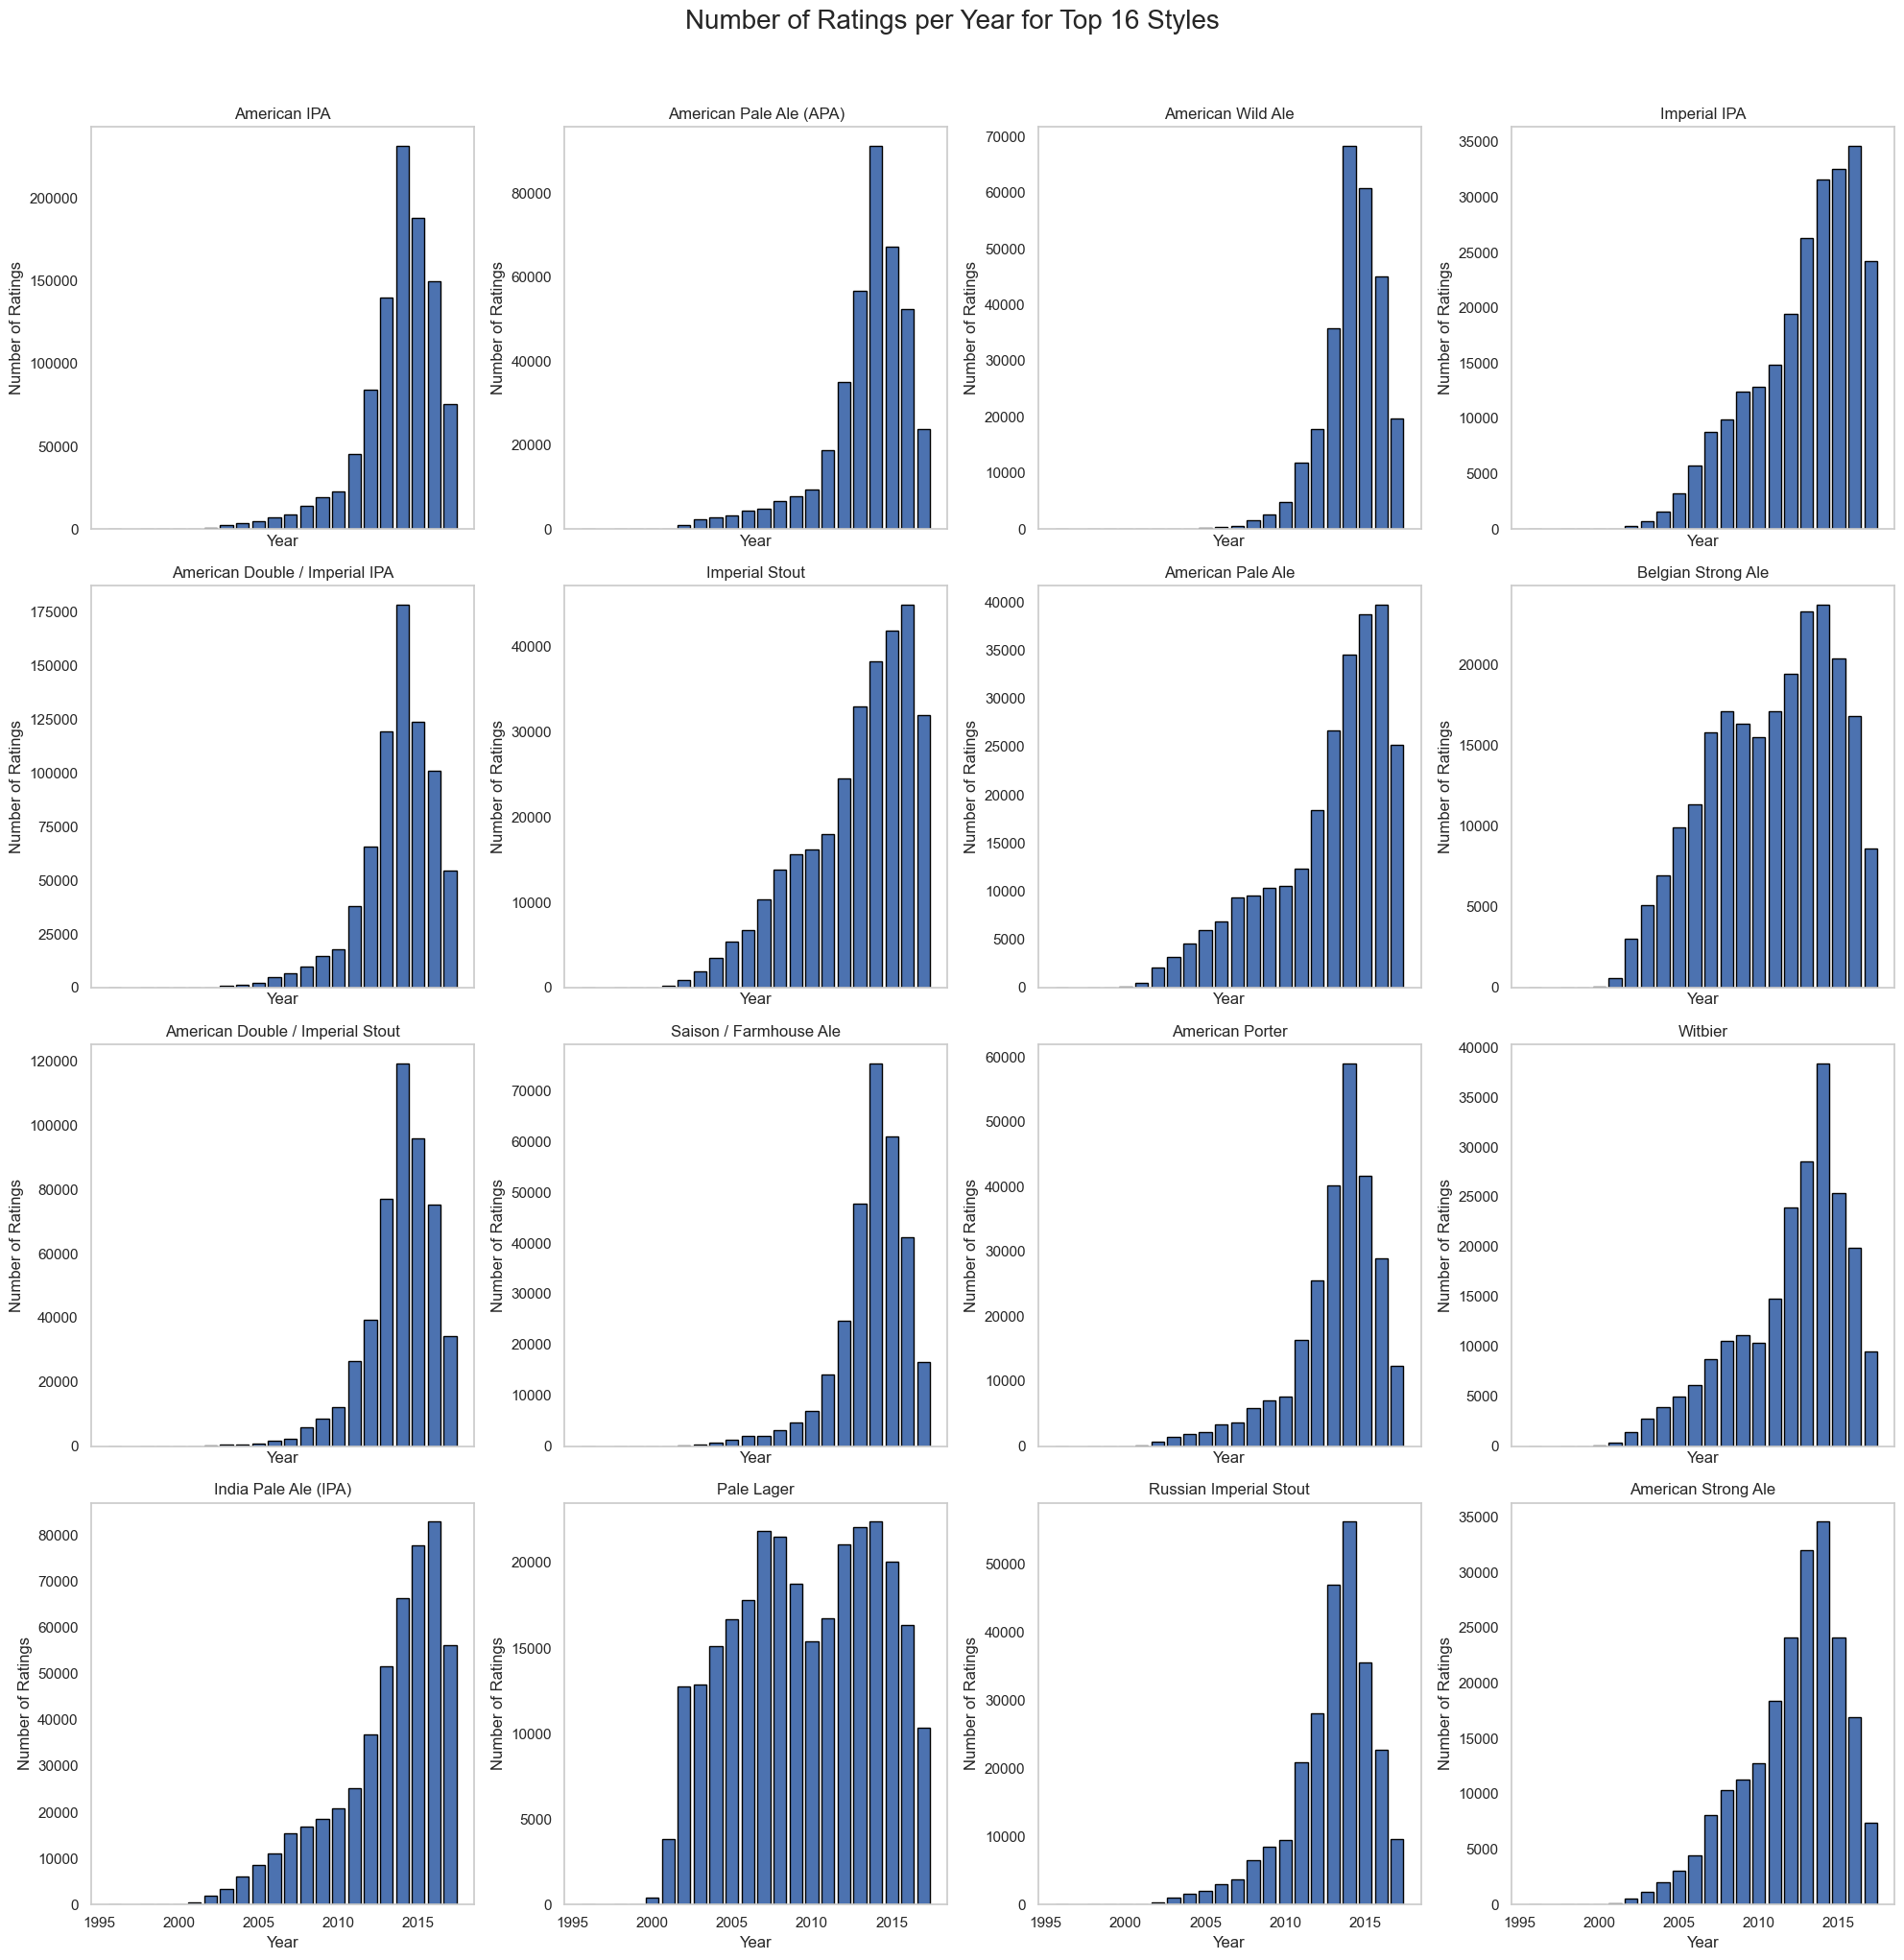

In [ ]:
fig, axes = plt.subplots(4,4, figsize = (20,20), sharex = True)
bins_ =10


years_rating = df_ratings_stats['year'].unique()
years_rating = sorted(years_rating)
years_rating

for i in range(0,4):
    for j in range(0,4):
        ax = axes[i,j]
        current_style = top_16[i + 4 * j]
        ax.set_title(current_style) 
        style_ratings = df_top_16.loc[current_style]
        ax.bar(style_ratings.index, style_ratings.values, edgecolor='black')
        ax.grid(False)
        ax.set_xlabel('Year')
        ax.set_ylabel('Number of Ratings')

fig.suptitle('Number of Ratings per Year for Top 16 Styles', fontsize=20, y=1.02)
fig.tight_layout()
plt.show()

In [ ]:
top_16

array(['American IPA', 'American Double / Imperial IPA',
       'American Double / Imperial Stout', 'India Pale Ale (IPA)',
       'American Pale Ale (APA)', 'Imperial Stout',
       'Saison / Farmhouse Ale', 'Pale Lager', 'American Wild Ale',
       'American Pale Ale', 'American Porter', 'Russian Imperial Stout',
       'Imperial IPA', 'Belgian Strong Ale', 'Witbier',
       'American Strong Ale'], dtype=object)

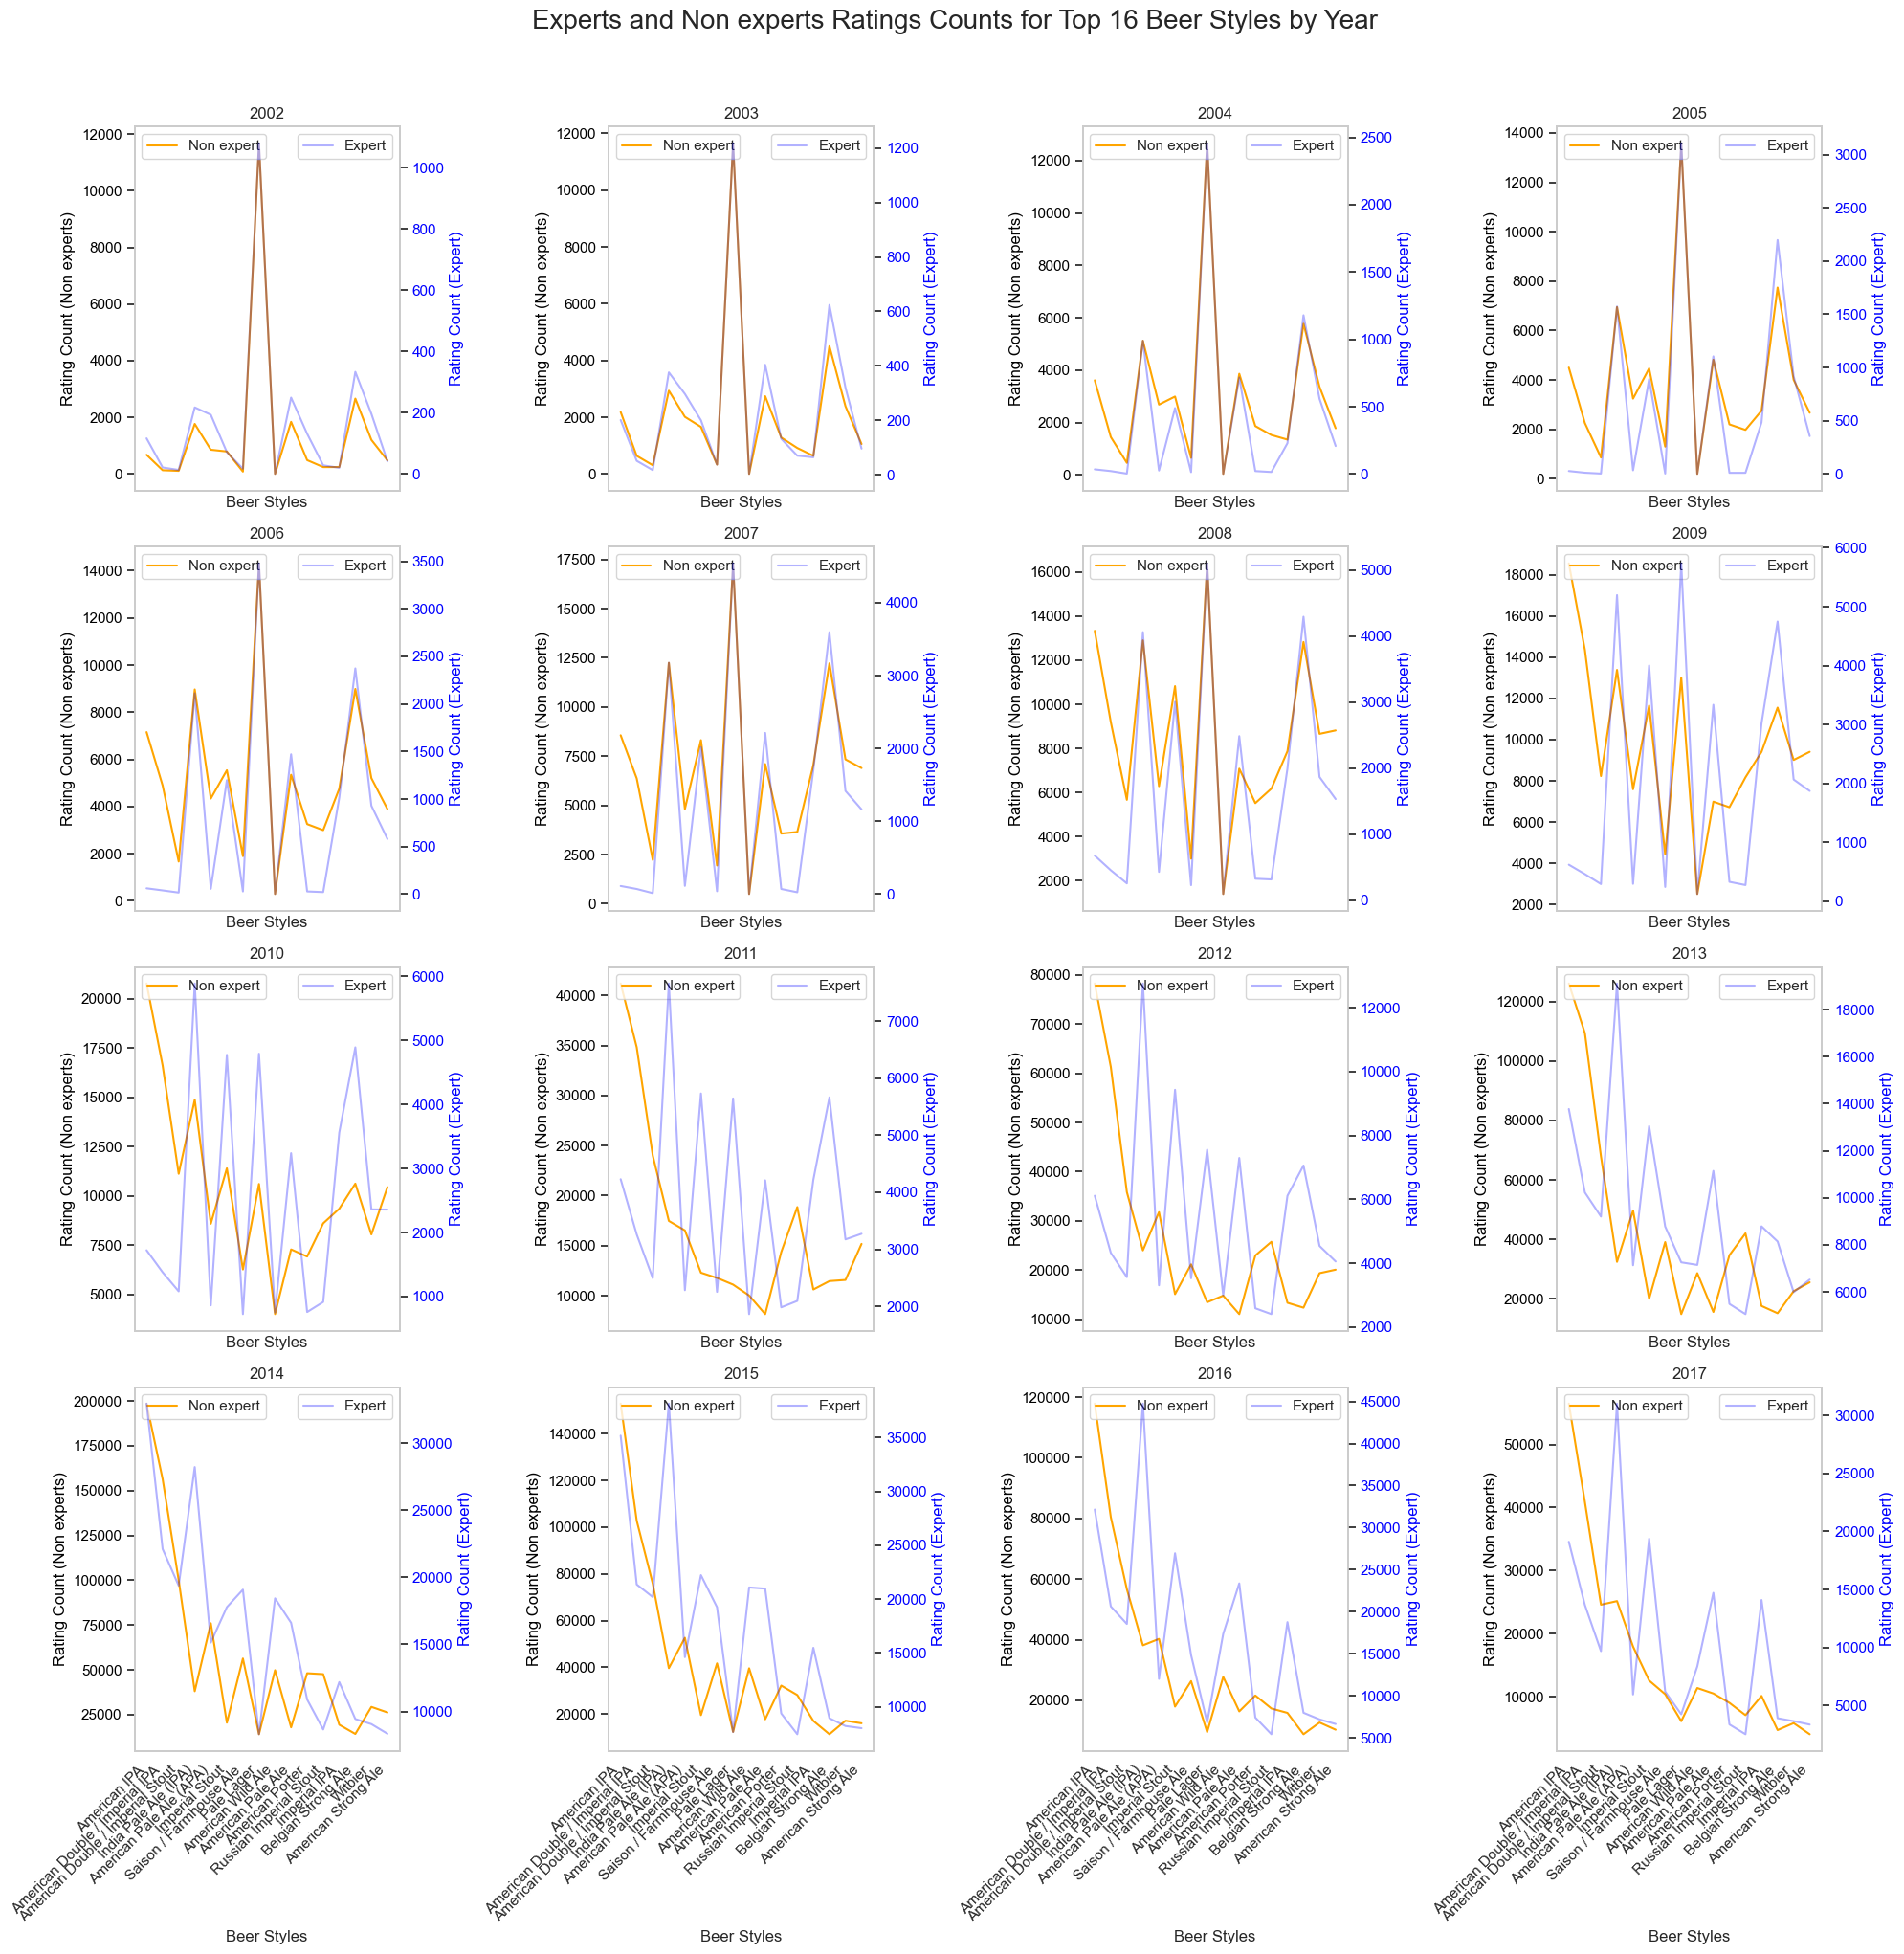

In [ ]:
years_ = [year for year in years_rating if year > 2001]
n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), sharex=True)
for i, year in enumerate(years_):
    
    row = i // n_cols
    col = i % n_cols
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_ratings_stat_year = df_ratings_stats.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_id
    df_expert = df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]
    df_normal = df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]
    df_stats_per_year_expert = df_expert.groupby(['style', 'year']).size().reset_index(name='nb_ratings')
    df_stats_per_year_normal = df_normal.groupby(['style', 'year']).size().reset_index(name='nb_ratings')
    df_styles_peryear_pivot_expert = df_stats_per_year_expert.pivot(index='style', columns='year', values='nb_ratings')
    df_styles_peryear_pivot_expert.fillna(0, inplace=True)
    df_styles_peryear_pivot_normal = df_stats_per_year_normal.pivot(index='style', columns='year', values='nb_ratings')
    df_styles_peryear_pivot_normal.fillna(0, inplace=True)
    for column in top_16:
        if column not in df_styles_peryear_pivot_expert.index:
            df_styles_peryear_pivot_expert.loc[column] = 0
            df_styles_peryear_pivot_normal.loc[column] = 0
    df_top_16_expert = df_styles_peryear_pivot_expert.loc[top_16]
    df_top_16_normal = df_styles_peryear_pivot_normal.loc[top_16]
    ax = axes[row, col]
    ax.plot(df_top_16_normal.index, df_top_16_normal.values, label='Non expert', color='orange')
    ax.set_xticks(df_top_16_normal.index,df_top_16_normal.index, rotation=45, ha='right')
    ax.set_xlabel('Beer Styles')
    ax.set_ylabel('Rating Count (Non experts)', color='black')
    ax.tick_params(axis='y', labelcolor='black')
    ax2 = ax.twinx()
    ax2.plot(df_top_16_expert.index, df_top_16_expert.values, label='Expert', color='blue',alpha=0.3)
    ax2.set_ylabel('Rating Count (Expert)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax.set_title(str(year))
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax.grid(False)
    ax2.grid(False)
fig.suptitle('Experts and Non experts Ratings Counts for Top 16 Beer Styles by Year', fontsize=20, y=1.02)
fig.tight_layout()
plt.show()


For the first years we observe that the distribution is similar between the experts and the others. However, the trend changes from year 2010. Since then, experts tend to rate different beers (in terms of style) than non experts. Plus, for certain beers, there are more ratings done by experts than non experts. Let's investigate this last point !

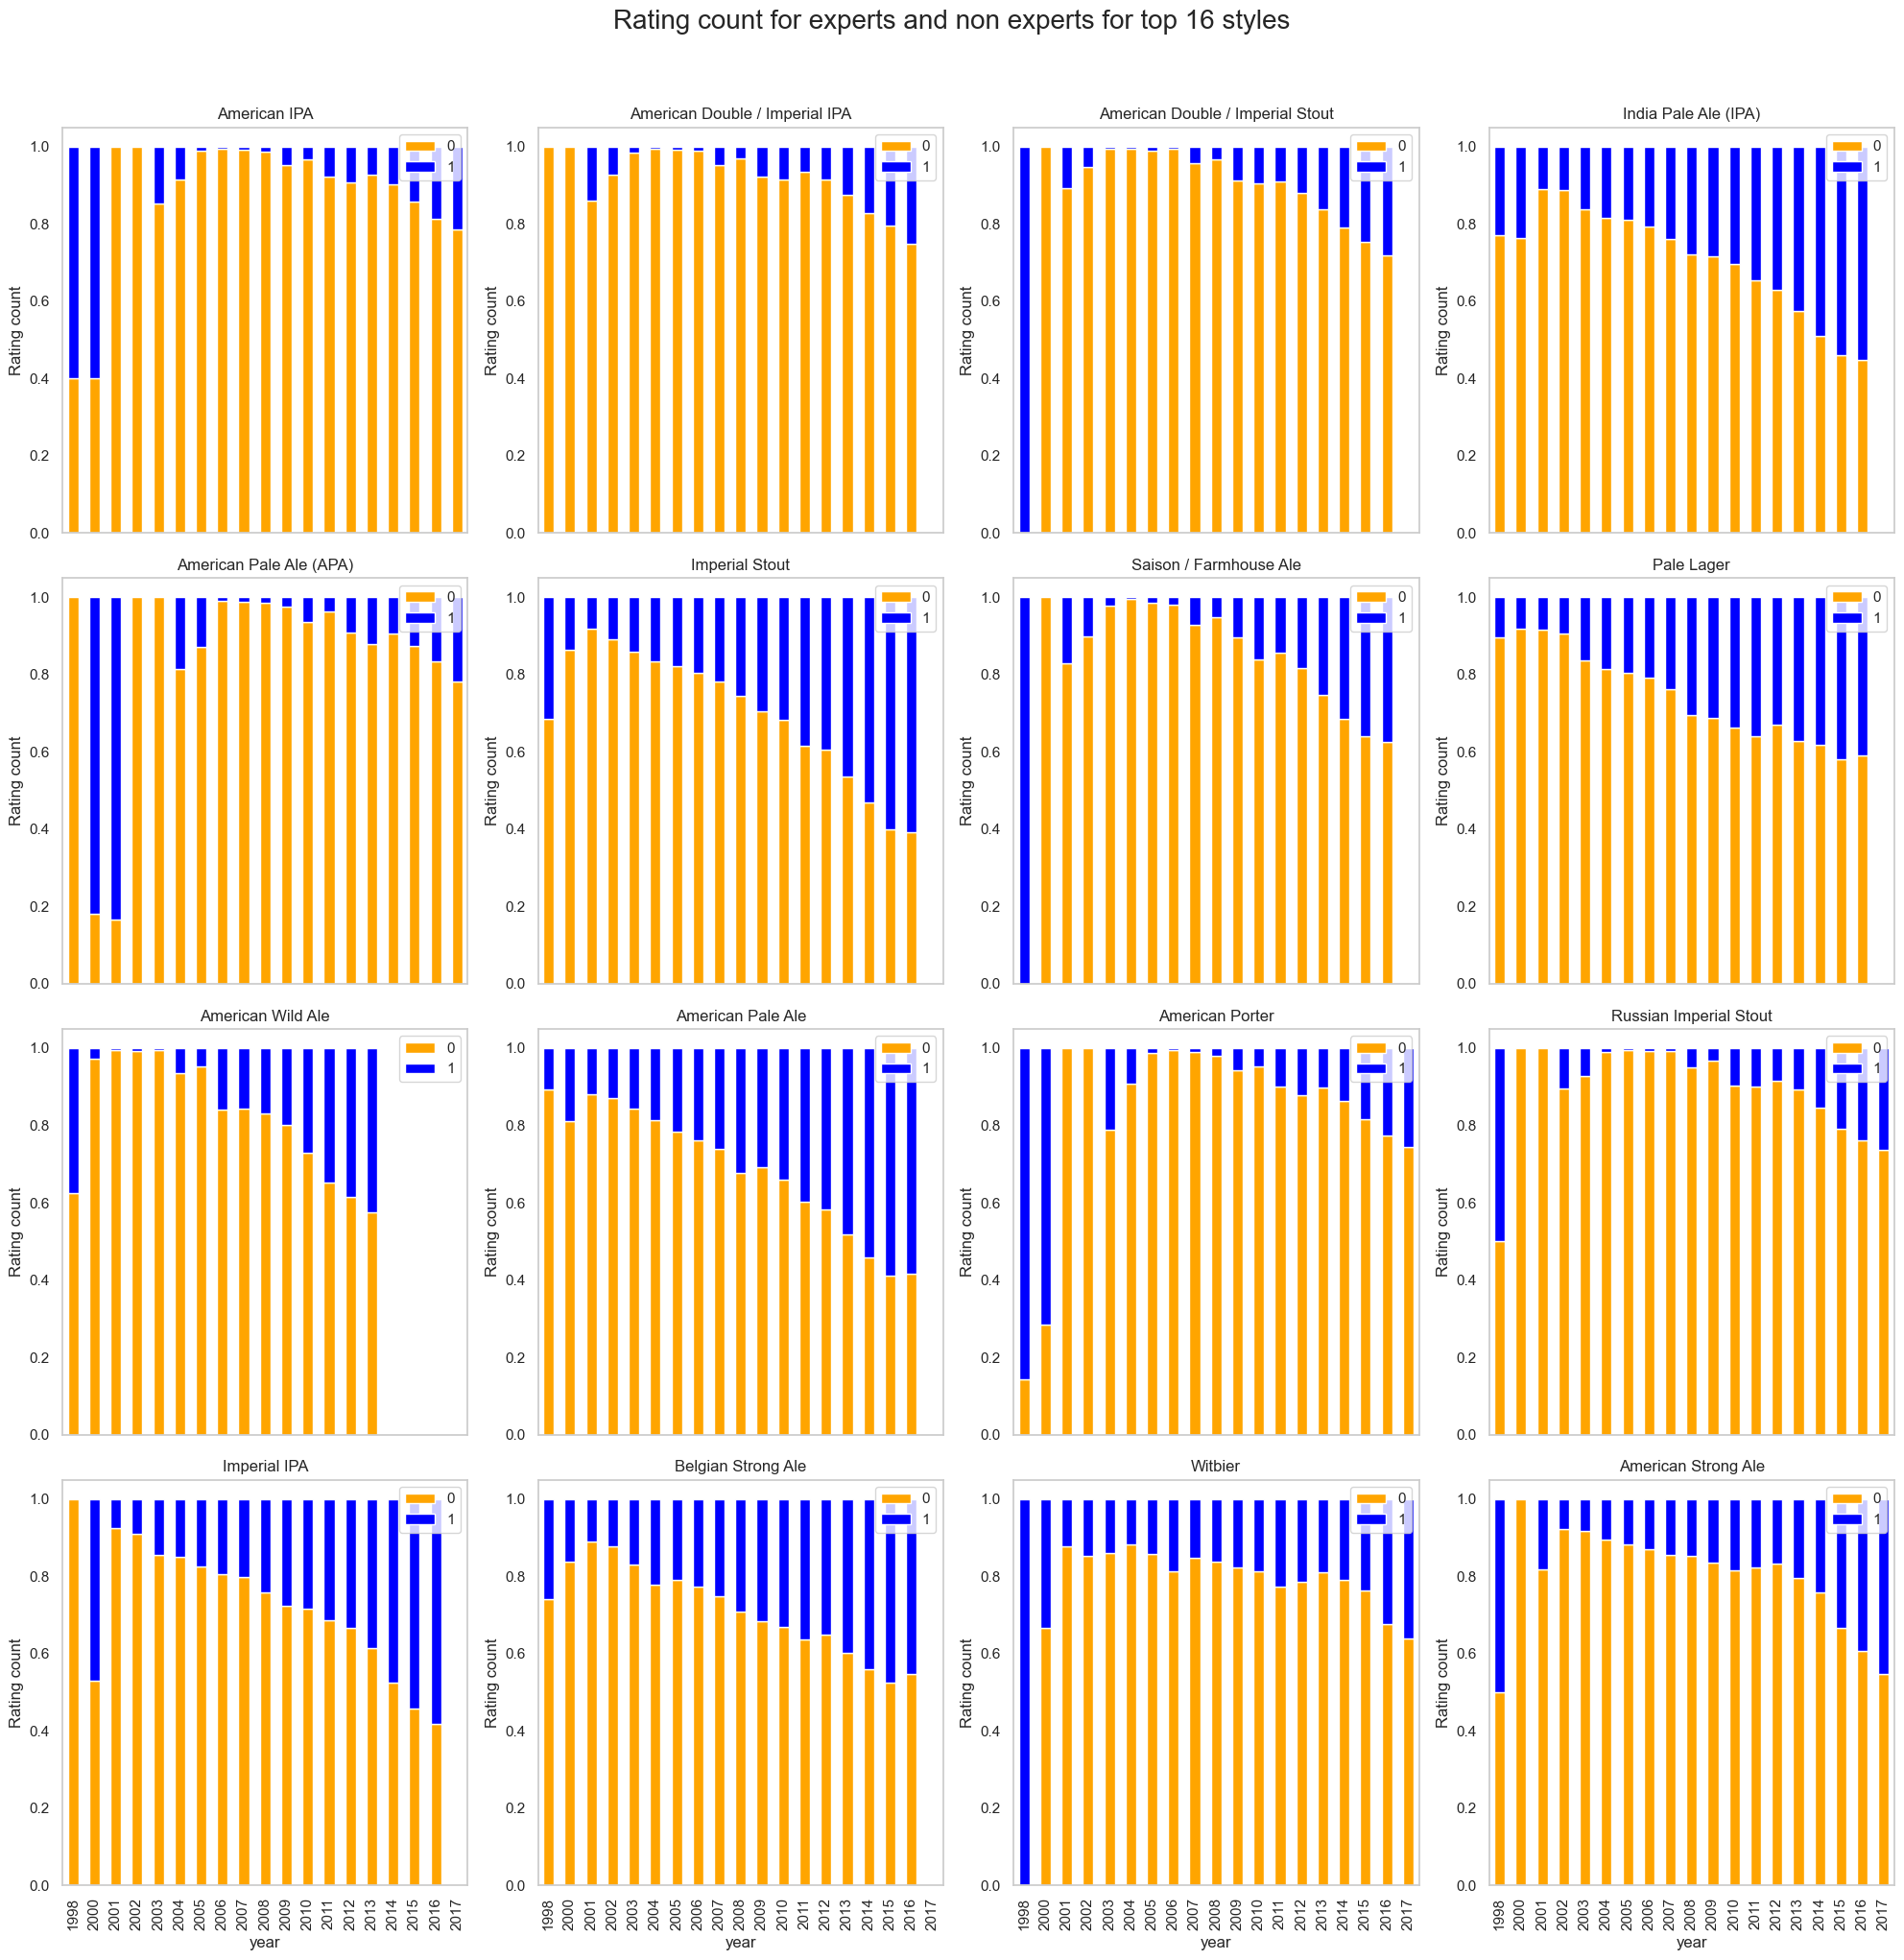

In [ ]:
fig,ax=plt.subplots(4,4,sharex=True)
fig.set_size_inches(20,20)
n_rows=4
n_cols=4
for i,style in enumerate(top_16):
    df_style=df_ratings_stats.loc[df_ratings_stats["style"]==style].groupby(["year","is_expert"])["rating"].agg("count").reset_index()
    df_style["rating"]=df_style["rating"]/df_style.groupby("year")["rating"].transform("sum")
    df_style.pivot(index="year",columns="is_expert",values="rating").plot(kind="bar",stacked=True,ax=ax[i//n_cols,i%n_cols],color=['orange', 'blue'])

    ax[i//n_cols,i%n_cols].set_title(style)
    ax[i//n_cols,i%n_cols].set_ylabel("Rating count")
    ax[i//n_cols,i%n_cols].legend()
    ax[i//n_cols,i%n_cols].grid(False)
    
fig.suptitle("Rating count for experts and non experts for top 16 styles",fontsize=20,y=1.02)
fig.tight_layout()
plt.show()

First of all, even if experts account only for 0.5% of the active they represent a big part in the ratings of the beers. There are even some years and styles for which thew overtake non experts part.

Thus their voice really matter since hey can make a huge difference for the final average rating displayed on websites.

It leads us to wonder if their ratings differentiate

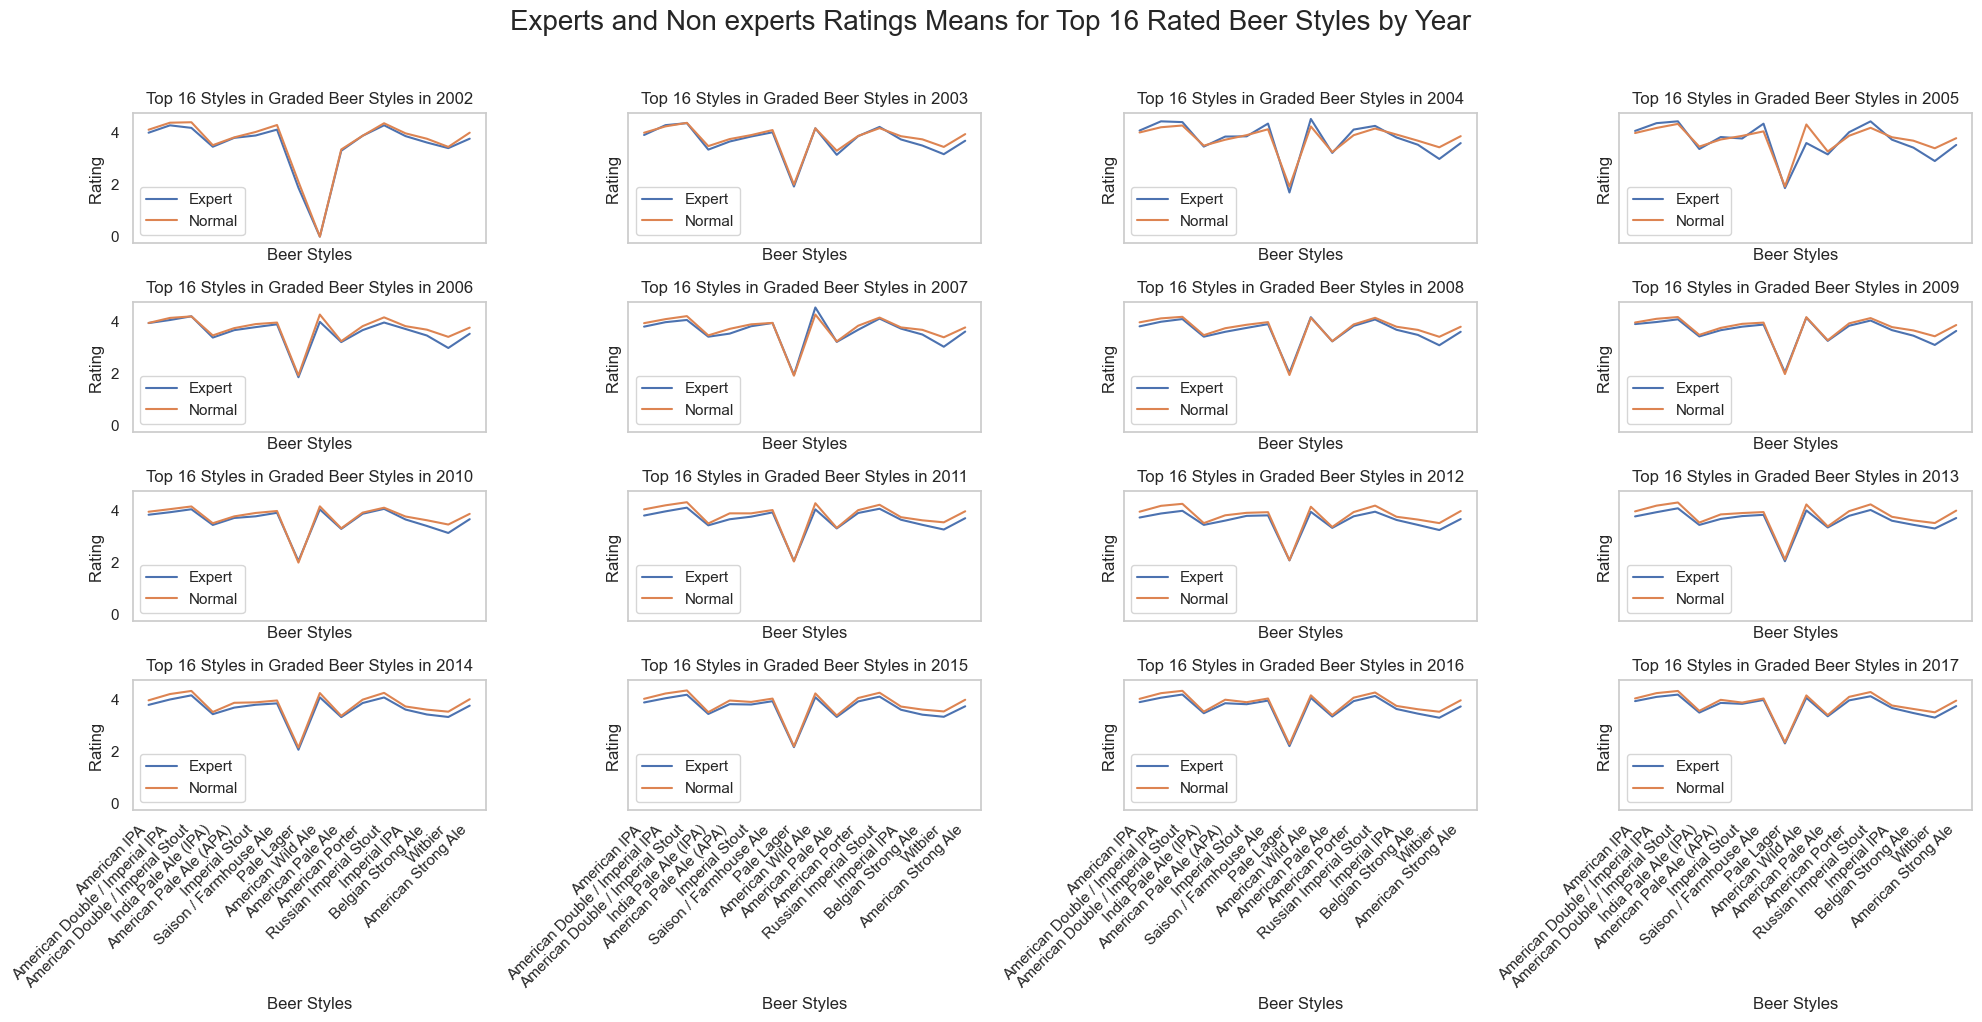

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(20, 10), sharex = True, sharey = True)

# Aplatir la matrice des subplots pour faciliter l'indexation
axs = axs.flatten()

# Itérer sur les années et les subplots
for i, year in enumerate(years_):
    df_expert_year = df_ratings_stat_expert.query('year == @year')
    df_ratings_stat_year = df_ratings_stats.query('year == @year')
    expert_of_the_year = df_expert_year[df_expert_year.is_expert].user_id
    df_expert = df_ratings_stat_year[df_ratings_stat_year['user_id'].isin(expert_of_the_year)]
    df_normal = df_ratings_stat_year[~df_ratings_stat_year['user_id'].isin(expert_of_the_year)]
    ratings_per_style_expert = df_expert.groupby('style')['rating'].mean().reset_index(name='rating_mean')
    ratings_per_style_normal = df_normal.groupby('style')['rating'].mean().reset_index(name='rating_mean')
    df_stats_per_year_expert = df_expert.groupby(['style', 'year'])['rating'].mean().reset_index(name='ratings_mean')
    df_stats_per_year_normal = df_normal.groupby(['style', 'year'])['rating'].mean().reset_index(name='ratings_mean')
    df_styles_peryear_pivot_expert = df_stats_per_year_expert.pivot(index='style', columns='year', values='ratings_mean')
    df_styles_peryear_pivot_expert.fillna(0, inplace=True)
    df_styles_peryear_pivot_normal = df_stats_per_year_normal.pivot(index='style', columns='year', values='ratings_mean')
    df_styles_peryear_pivot_normal.fillna(0, inplace=True)
    for column in top_16:
        if column not in df_styles_peryear_pivot_expert.index:
            df_styles_peryear_pivot_expert.loc[column] = 0
            df_styles_peryear_pivot_normal.loc[column] = 0
    df_top_16_expert = df_styles_peryear_pivot_expert.loc[top_16]
    df_top_16_normal = df_styles_peryear_pivot_normal.loc[top_16]

    # Utiliser l'index du subplot actuel
    ax = axs[i]

    # Tracer sur le subplot
    ax.plot(df_top_16_expert.index, df_top_16_expert.values, label='Expert')
    ax.plot(df_top_16_normal.index, df_top_16_normal.values, label='Normal')
    ax.set_xticks(range(len(top_16)))
    ax.set_xticklabels(top_16, rotation=45, ha='right')
    ax.set_xlabel('Beer Styles')
    ax.set_ylabel('Rating ')
    ax.set_title('Top 16 Styles in Graded Beer Styles in ' + str(year))
    ax.legend()
    ax.grid(False)
fig.suptitle('Experts and Non experts Ratings Means for Top 16 Rated Beer Styles by Year', fontsize=20, y=1.02)

fig.tight_layout()
plt.show()

We observe that experts and non experts have similar behaviour on the most rated beer styles. Hence, we can say that highly-popular beers makers can work regardless of a side-effect of experts.

#### 1.2.e) Now let's analyse how their ratings differentiate

In [163]:
minimum_number_of_ratings=100
YEAR=2017
absolute_difference_ratings=[]

df_ratings_this_year,experts_id=filter_year_and_add_is_expert(df_ratings_stats,YEAR,df_ratings_stat_expert)
beers_with_enough_ratings=df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>minimum_number_of_ratings].index.values
df_advocate_ratings_this_year_with_enough_ratings=df_ratings_this_year.loc[df_ratings_this_year["beer_id"].isin(beers_with_enough_ratings)]
difference_ratings_medians=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("median")

for beer_id in difference_ratings_medians.index.get_level_values(0).unique():
    if 0 in difference_ratings_medians.loc[beer_id] and 1 in difference_ratings_medians.loc[beer_id]:
        absolute_difference_ratings.append(np.abs(difference_ratings_medians.loc[beer_id,0]-difference_ratings_medians.loc[beer_id,1]))


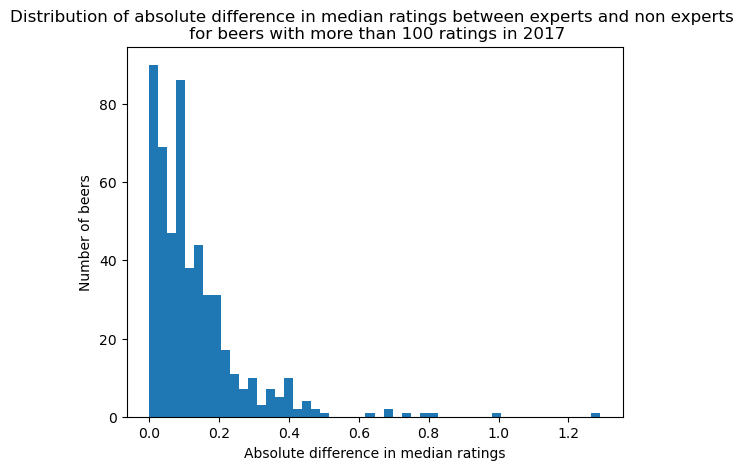

In [166]:
plt.hist(absolute_difference_ratings,bins=50)
plt.xlabel("Absolute difference in median ratings")
plt.ylabel("Number of beers")
plt.title(f"Distribution of absolute difference in median ratings between experts and non experts \n for beers with more than {minimum_number_of_ratings} ratings in {YEAR}")
plt.show()

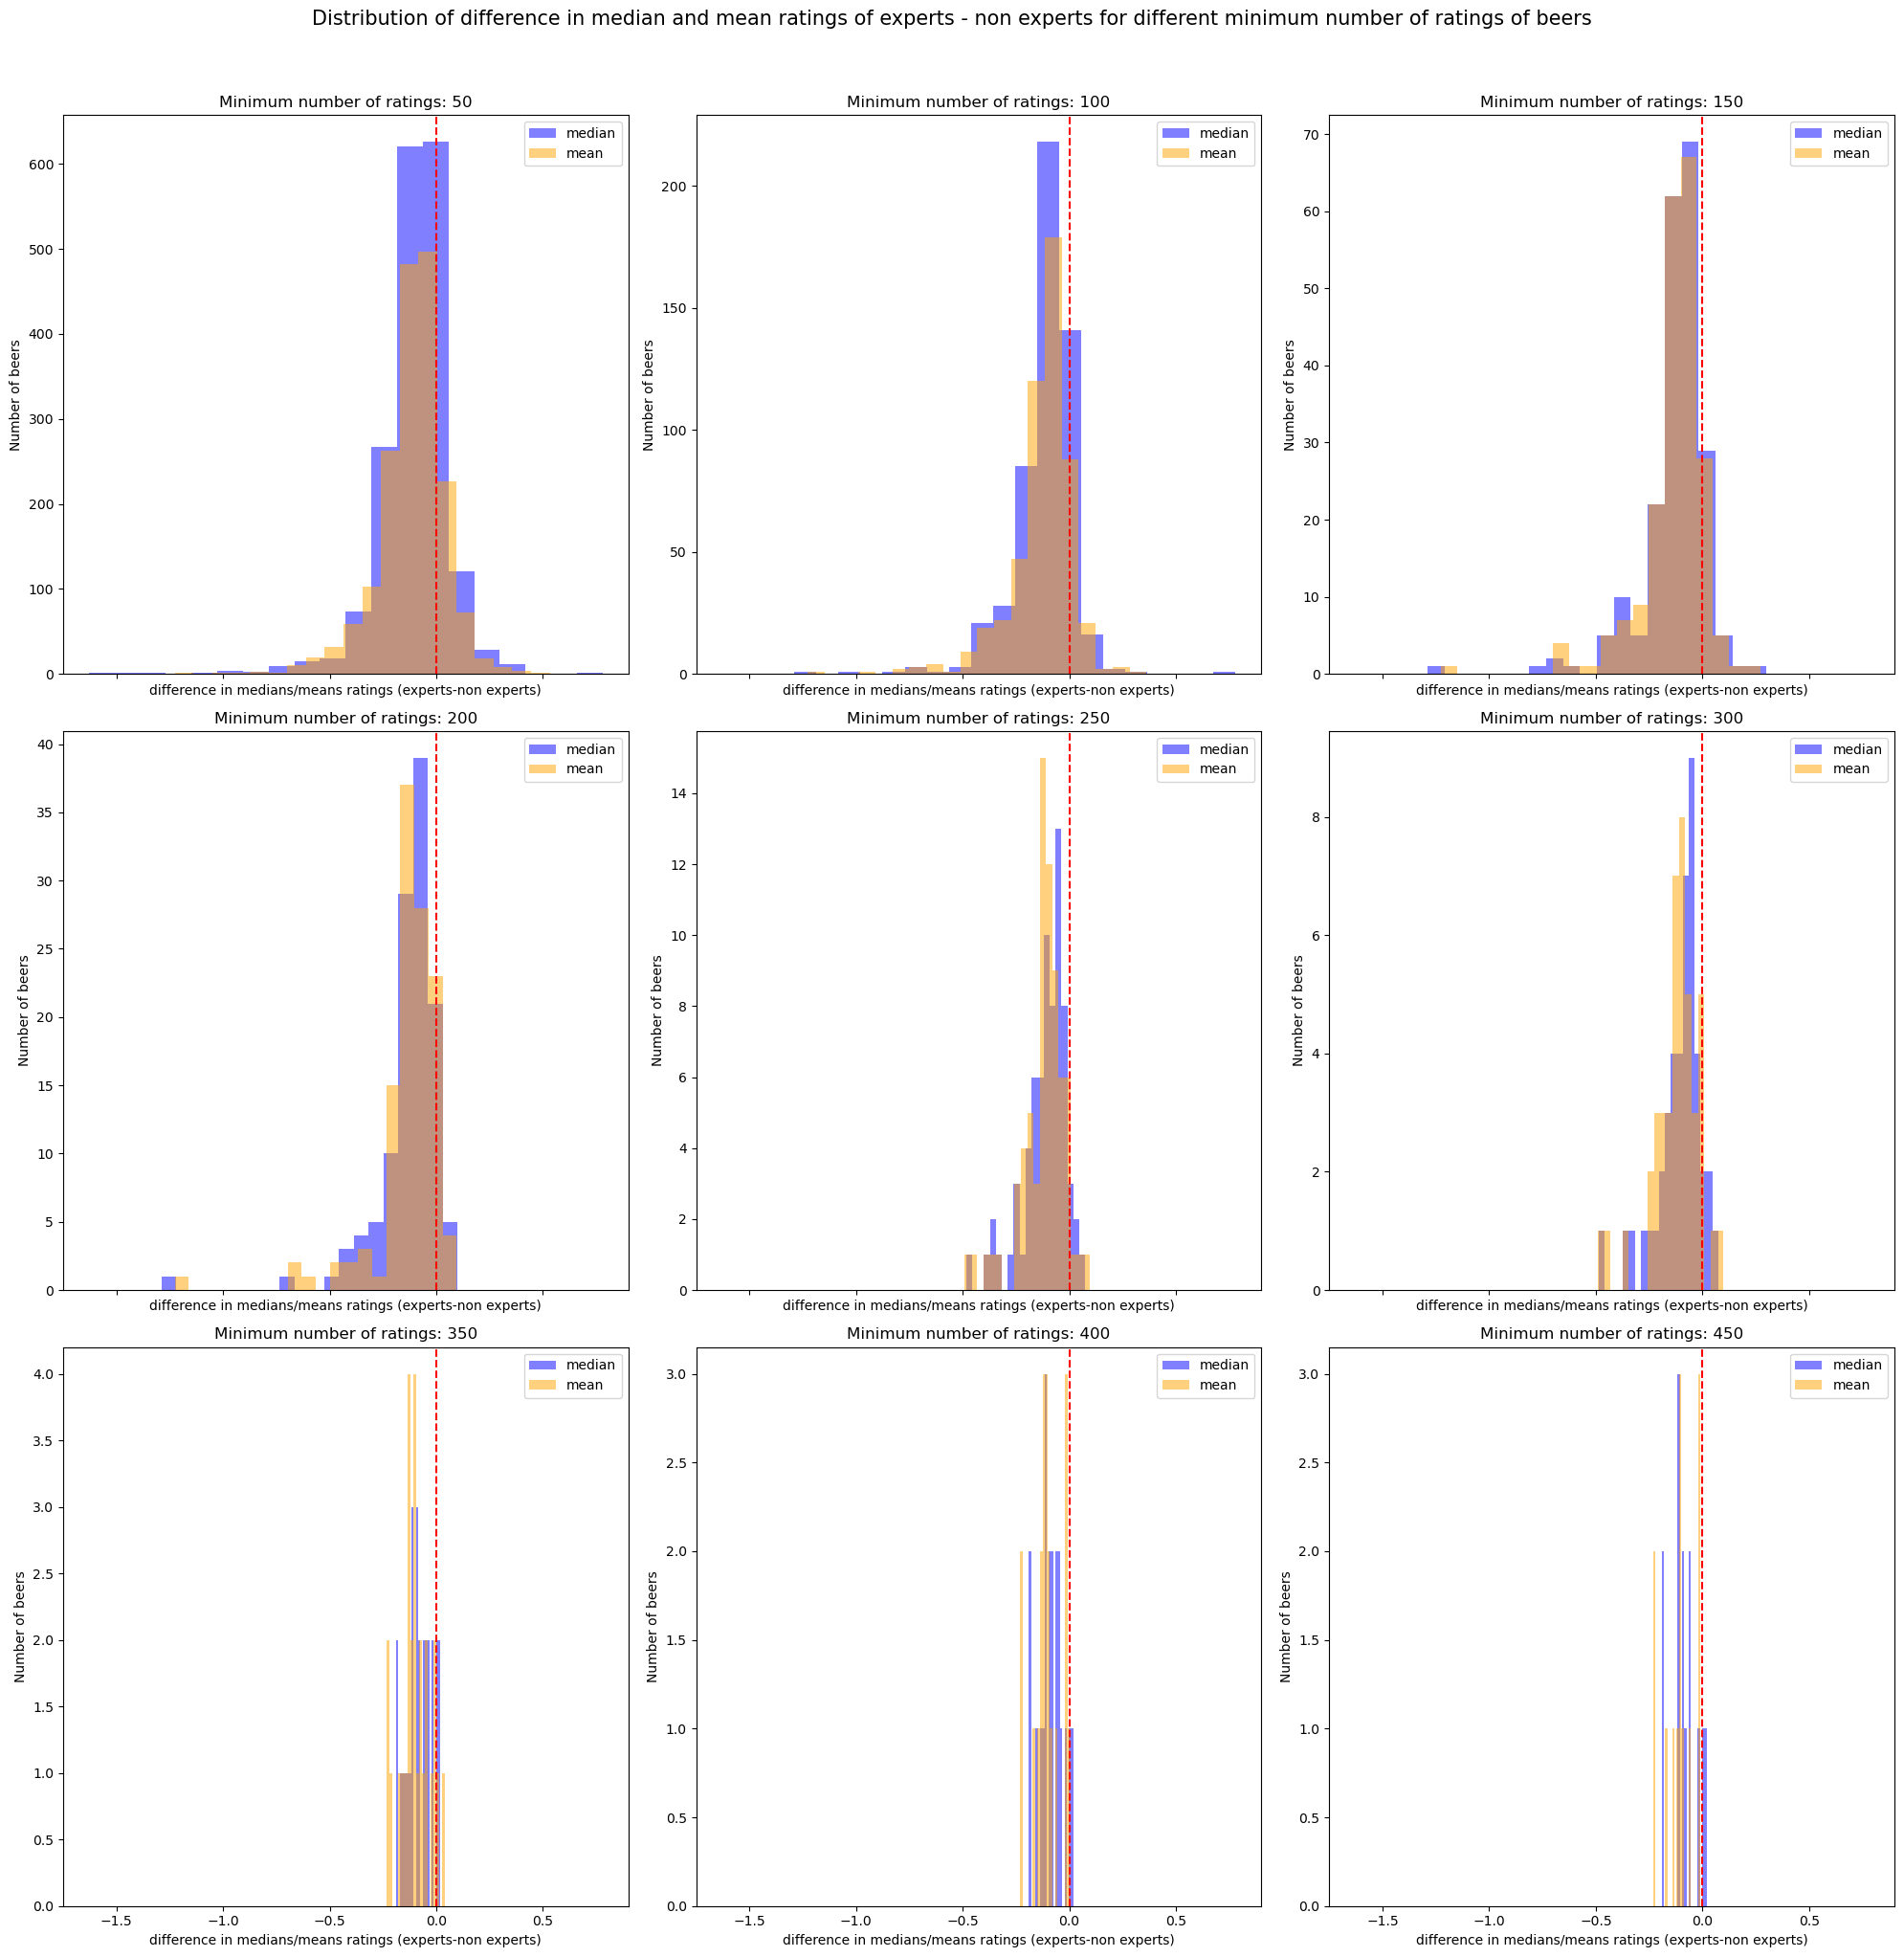

In [138]:
fig,ax=plt.subplots(int(np.ceil(len(np.arange(50,500,50))/3)),3,sharex=True)
fig.set_size_inches(20,20)
nb_bins=20

for i,minimum_number_of_ratings in enumerate(np.arange(50,500,50)):
    difference_ratings_medians_list=[]
    difference_ratings_means_list=[]
    beers_with_enough_ratings=df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>minimum_number_of_ratings].index.values
    df_advocate_ratings_this_year_with_enough_ratings=df_ratings_this_year.loc[df_ratings_this_year["beer_id"].isin(beers_with_enough_ratings)]
    difference_ratings_medians=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("median")
    difference_ratings_means=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("mean")
    
    for beer_id in difference_ratings_medians.index.get_level_values(0).unique():
        if 0 in difference_ratings_medians.loc[beer_id] and 1 in difference_ratings_medians.loc[beer_id]:
            difference_ratings_medians_list.append(difference_ratings_medians.loc[beer_id,1]-difference_ratings_medians.loc[beer_id,0])
            difference_ratings_means_list.append(difference_ratings_means.loc[beer_id,1]-difference_ratings_means.loc[beer_id,0])
    if i==0:
        difference_means_to_test=difference_ratings_means_list.copy()
    ax[i//3,i%3].hist(difference_ratings_medians_list,alpha=0.5,bins=nb_bins,color="b",label="median")
    ax[i//3,i%3].hist(difference_ratings_means_list,alpha=0.5,bins=nb_bins,color="orange",label="mean")
    ax[i//3,i%3].axvline(0,c="r",linestyle="--")
    ax[i//3,i%3].set_xlabel("difference in medians/means ratings (experts-non experts)")
    ax[i//3,i%3].set_ylabel("Number of beers")
    ax[i//3,i%3].set_title("Minimum number of ratings: "+str(minimum_number_of_ratings))
    ax[i//3,i%3].legend()
fig.suptitle("Distribution of difference in median and mean ratings of experts - non experts for different minimum number of ratings of beers",fontsize=15,y=1.02)
fig.tight_layout()
plt.show()

we see that the experts tend to be more severe (negative difference), lets check if this trend holds for all years

2006


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2007


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2008


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2009


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2010


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2011


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2012


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2013


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2014


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2015


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2016


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


2017


c:\Users\asemiz\ada\ada-2023-project-remontada\code\compute_experts.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_this_year["is_expert"] = df_this_year["user_id"].isin(experts_year).astype(int)


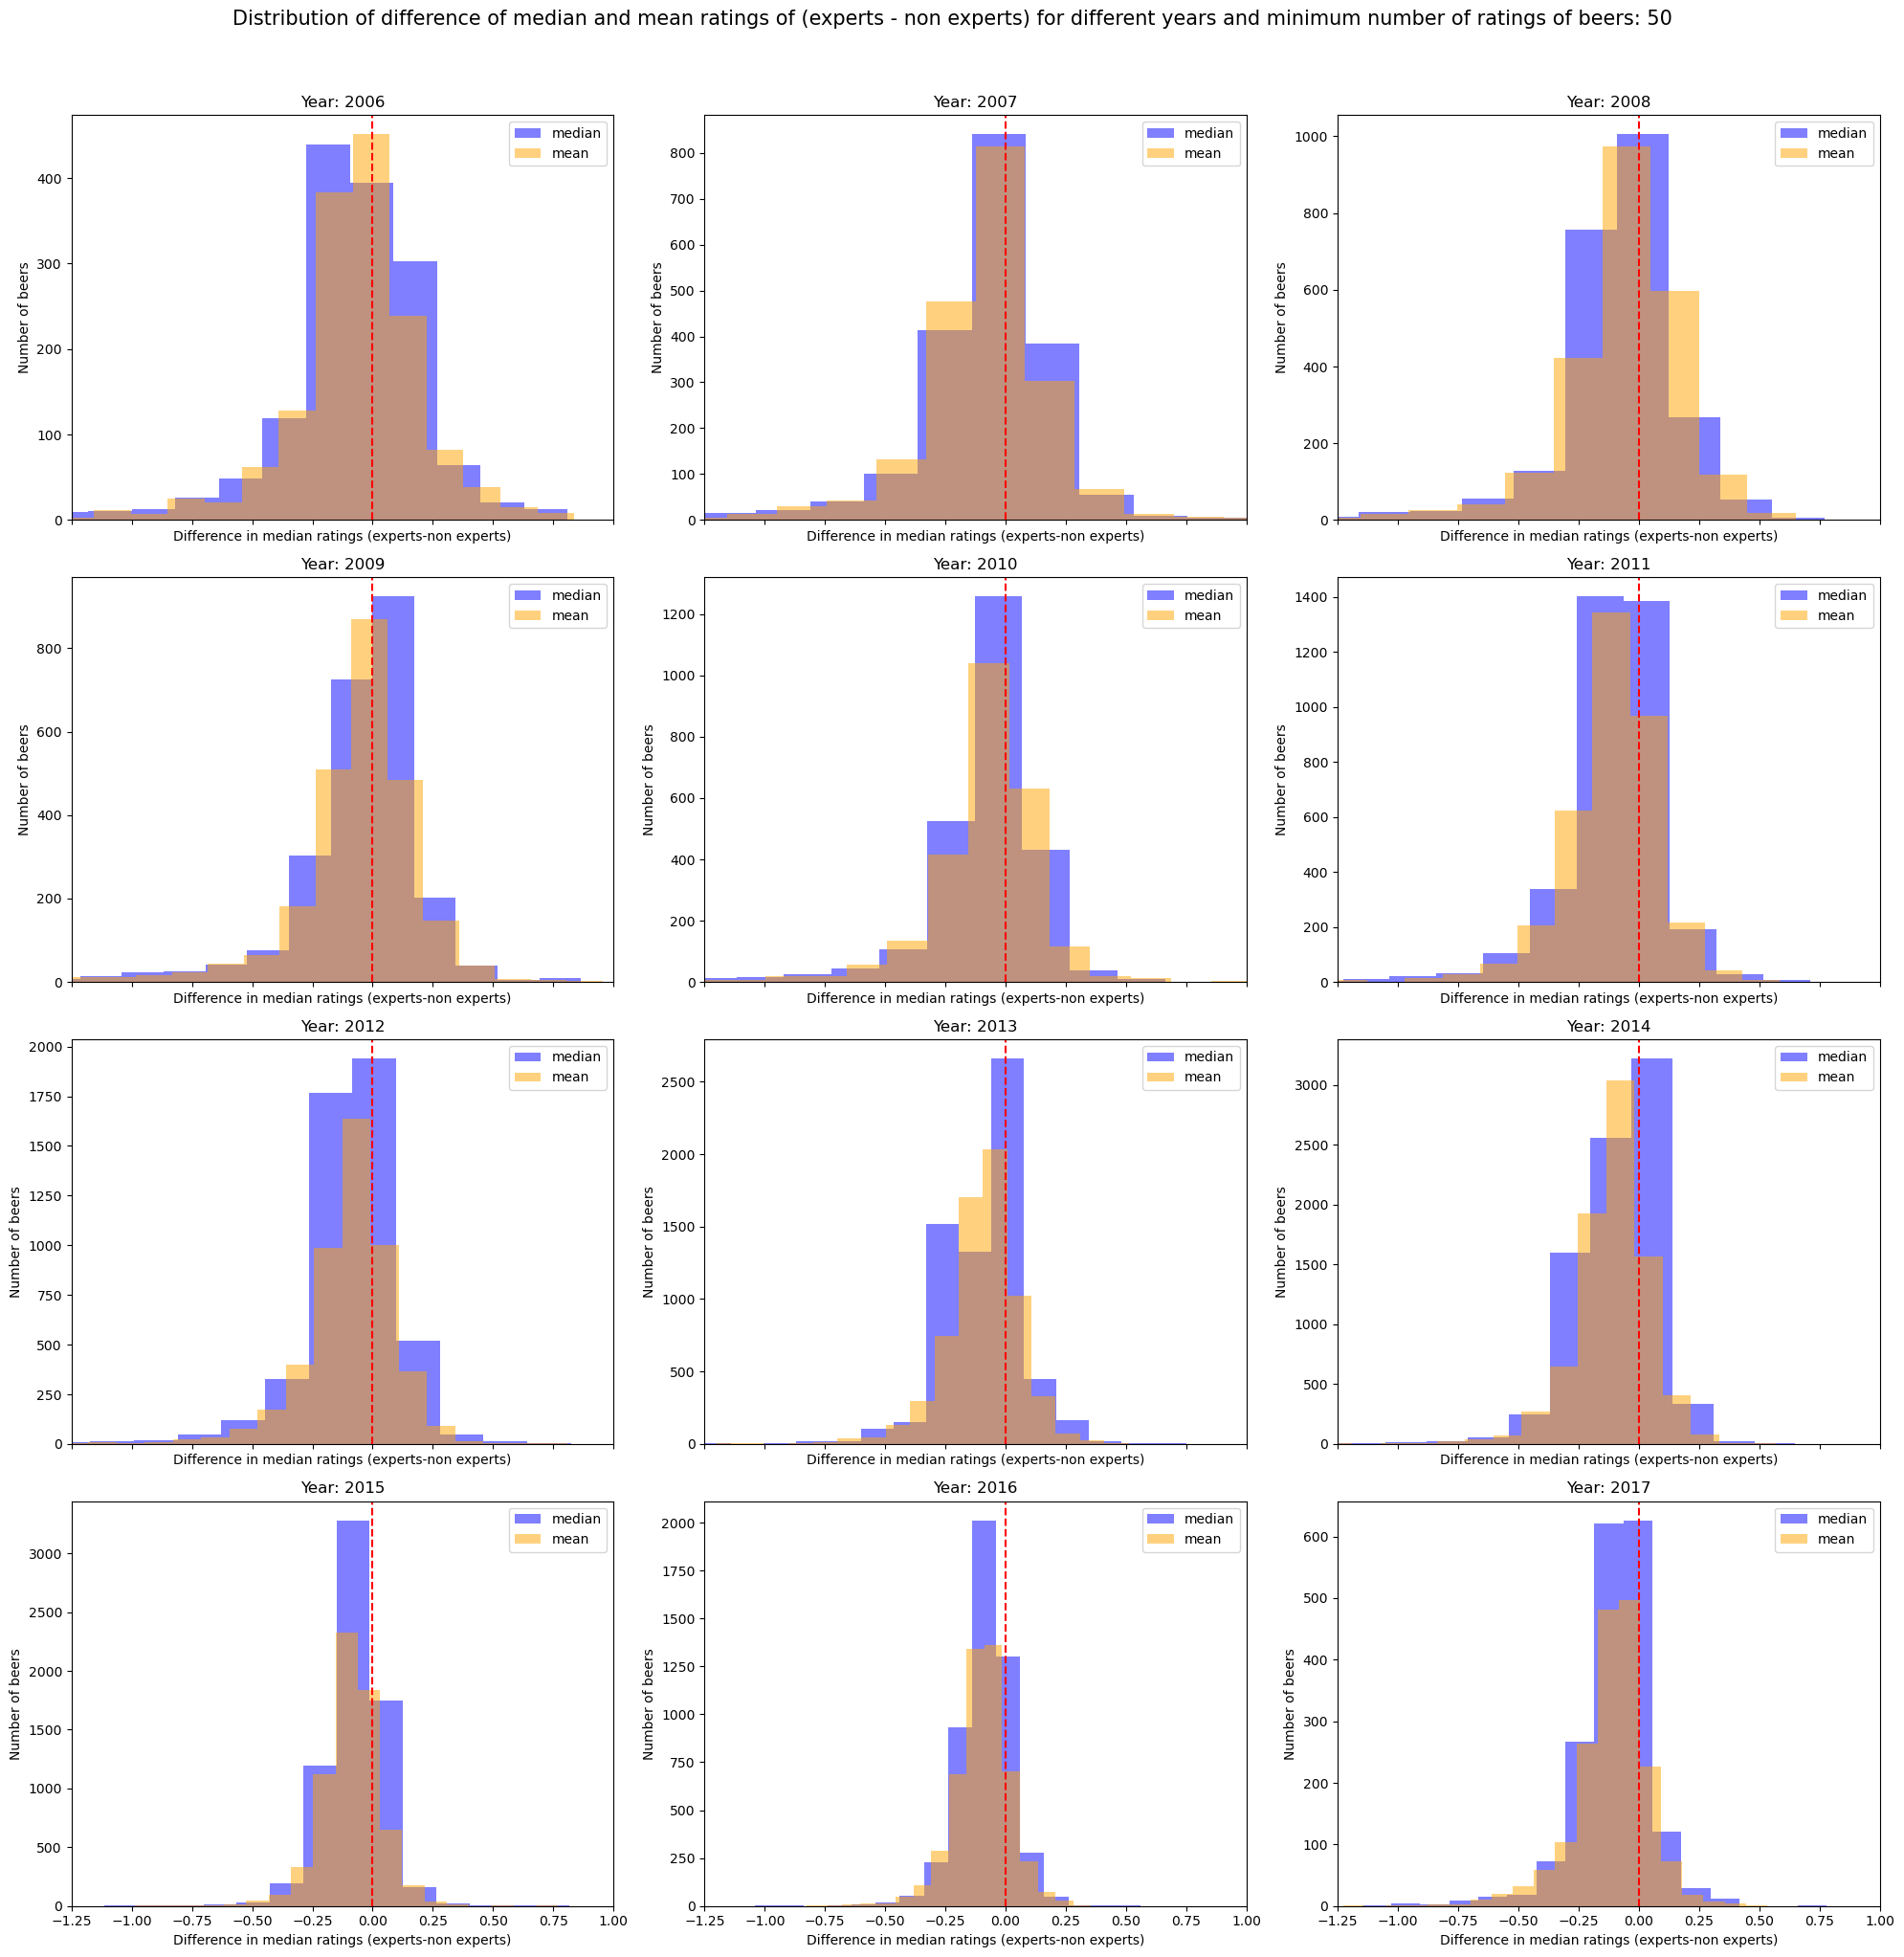

In [140]:
fig,ax=plt.subplots(4,3,sharex=True)
fig.set_size_inches(20,20)
nb_bins=20
min_number_of_ratings=50

for i,YEAR in enumerate(range(2006,2018)):
    print(YEAR)
    difference_ratings_medians_list=[]
    difference_ratings_means_list=[]
    df_ratings_this_year,experts_id=filter_year_and_add_is_expert(df_ratings_stats,YEAR,df_ratings_stat_expert)
    beers_with_enough_ratings=df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>min_number_of_ratings].index.values
    df_advocate_ratings_this_year_with_enough_ratings=df_ratings_this_year.loc[df_ratings_this_year["beer_id"].isin(beers_with_enough_ratings)]
    difference_ratings_medians=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("median")
    difference_ratings_means=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("mean")
    
    for beer_id in difference_ratings_medians.index.get_level_values(0).unique():
        if 0 in difference_ratings_medians.loc[beer_id] and 1 in difference_ratings_medians.loc[beer_id]:
            difference_ratings_medians_list.append(difference_ratings_medians.loc[beer_id,1]-difference_ratings_medians.loc[beer_id,0])
            difference_ratings_means_list.append(difference_ratings_means.loc[beer_id,1]-difference_ratings_means.loc[beer_id,0])
            
    ax[i//3,i%3].hist(difference_ratings_medians_list,alpha=0.5,bins=nb_bins,color="b",label="median")
    ax[i//3,i%3].hist(difference_ratings_means_list,alpha=0.5,bins=nb_bins,color="orange",label="mean")
    ax[i//3,i%3].axvline(0,c="r",linestyle="--")
    ax[i//3,i%3].set_xlim(-1.25,1)
    ax[i//3,i%3].set_xlabel("Difference in median ratings (experts-non experts)")
    ax[i//3,i%3].set_ylabel("Number of beers")
    ax[i//3,i%3].set_title("Year: "+str(YEAR))
    ax[i//3,i%3].legend()
fig.suptitle(f"Distribution of difference in median and mean ratings between (experts - non experts) for different years and minimum number of ratings of beers: {min_number_of_ratings}",fontsize=15,y=1.02)
fig.tight_layout()
plt.show()

the trend is not that obvious now, grouping the results by beer show that we cannot say that in average experts are more severe (on beers that have at least 50 ratings)

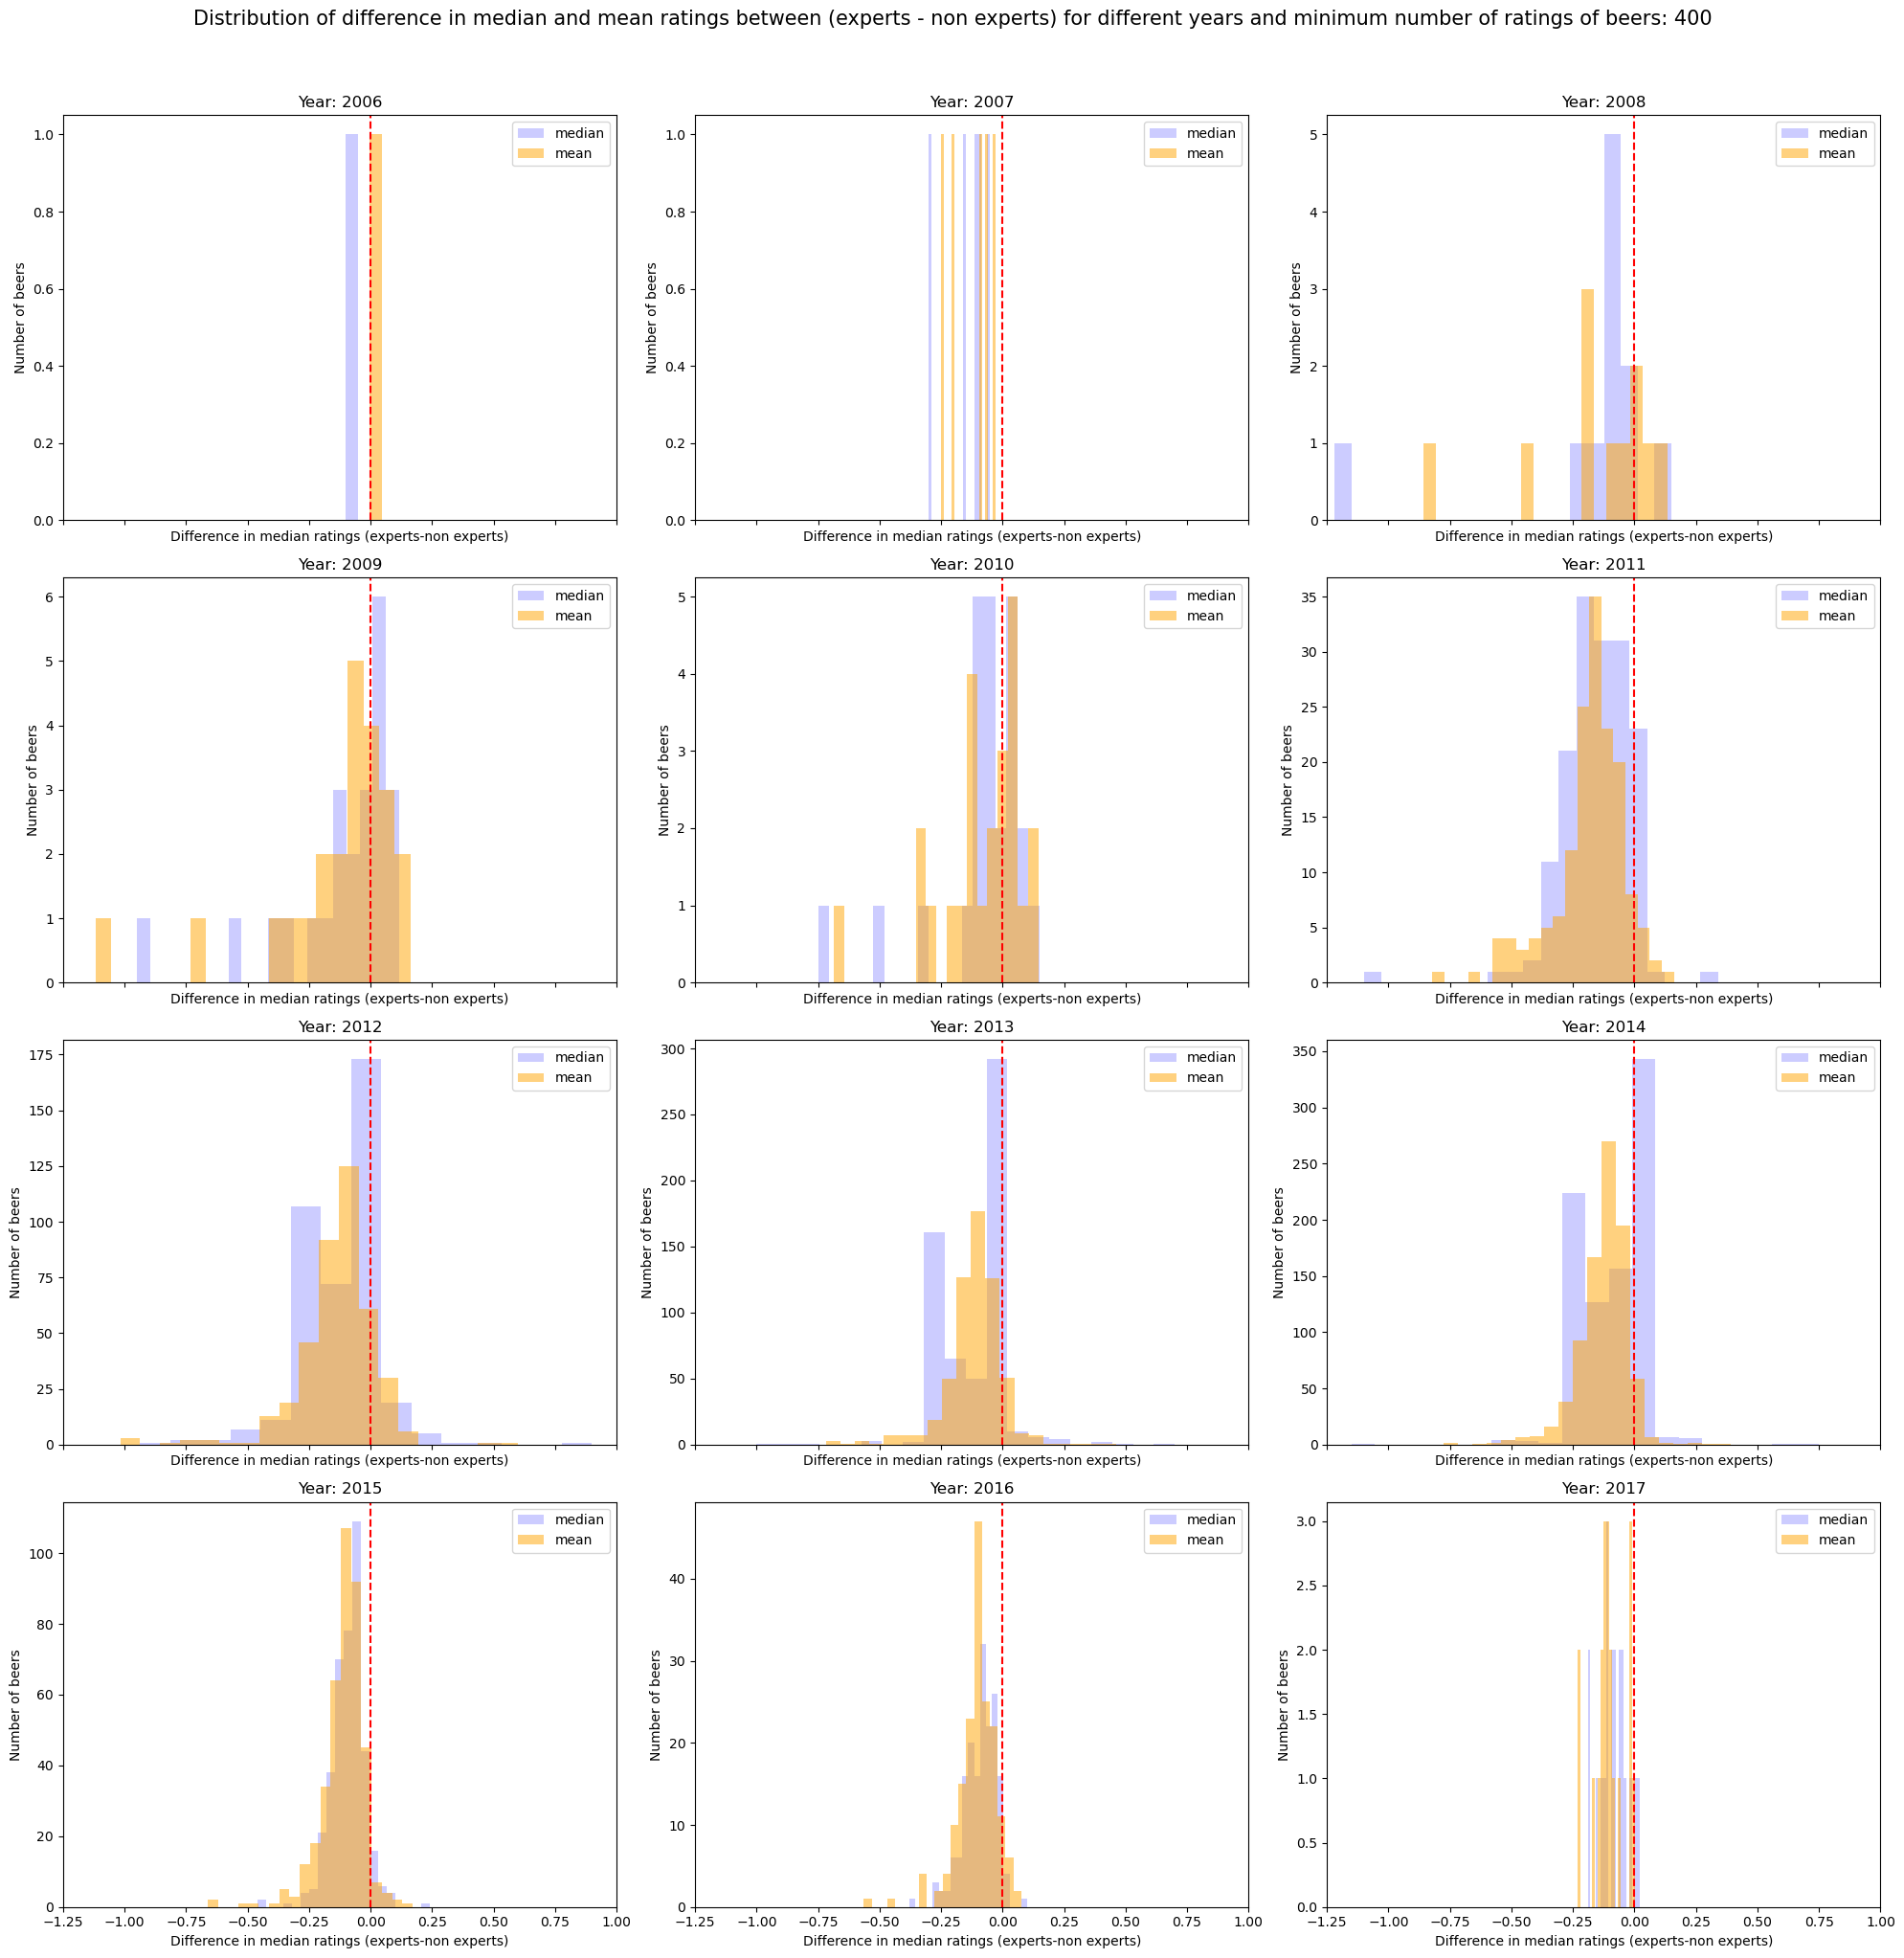

In [146]:
fig,ax=plt.subplots(4,3,sharex=True)
fig.set_size_inches(20,20)
nb_bins=20
min_number_of_ratings=400

for i,YEAR in enumerate(range(2006,2018)):
    difference_ratings_medians_list=[]
    difference_ratings_means_list=[]
    df_ratings_this_year,experts_id=filter_year_and_add_is_expert(df_ratings_stats,YEAR,df_ratings_stat_expert)
    beers_with_enough_ratings=df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>min_number_of_ratings].index.values
    df_advocate_ratings_this_year_with_enough_ratings=df_ratings_this_year.loc[df_ratings_this_year["beer_id"].isin(beers_with_enough_ratings)]
    difference_ratings_medians=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("median")
    difference_ratings_means=df_advocate_ratings_this_year_with_enough_ratings.groupby(["beer_id","is_expert"])["rating"].agg("mean")
    
    for beer_id in difference_ratings_medians.index.get_level_values(0).unique():
        if 0 in difference_ratings_medians.loc[beer_id] and 1 in difference_ratings_medians.loc[beer_id]:
            difference_ratings_medians_list.append(difference_ratings_medians.loc[beer_id,1]-difference_ratings_medians.loc[beer_id,0])
            difference_ratings_means_list.append(difference_ratings_means.loc[beer_id,1]-difference_ratings_means.loc[beer_id,0])
            
    ax[i//3,i%3].hist(difference_ratings_medians_list,alpha=0.2,bins=nb_bins,color="b",label="median")
    ax[i//3,i%3].hist(difference_ratings_means_list,alpha=0.5,bins=nb_bins,color="orange",label="mean")
    ax[i//3,i%3].axvline(0,c="r",linestyle="--")
    ax[i//3,i%3].set_xlim(-1.25,1)
    ax[i//3,i%3].set_xlabel("Difference in median ratings (experts-non experts)")
    ax[i//3,i%3].set_ylabel("Number of beers")
    ax[i//3,i%3].set_title("Year: "+str(YEAR))
    ax[i//3,i%3].legend()
fig.suptitle(f"Distribution of difference in median and mean ratings between (experts - non experts) for different years and minimum number of ratings of beers: {min_number_of_ratings}",fontsize=15,y=1.02)
fig.tight_layout()
plt.show()

With beers that have at least 400 ratings (the year of the analysis), the results seem different since the distribution of the mean difference (orange) is denser in the negative values, it invites us to imagine that experts are more severe on popular beers

### 1.2.f) Analysis of the ratings for specific beers

In [147]:
YEAR=2016
df_ratings_this_year,experts_id=filter_year_and_add_is_expert(df_ratings_stats,YEAR,df_ratings_stat_expert)

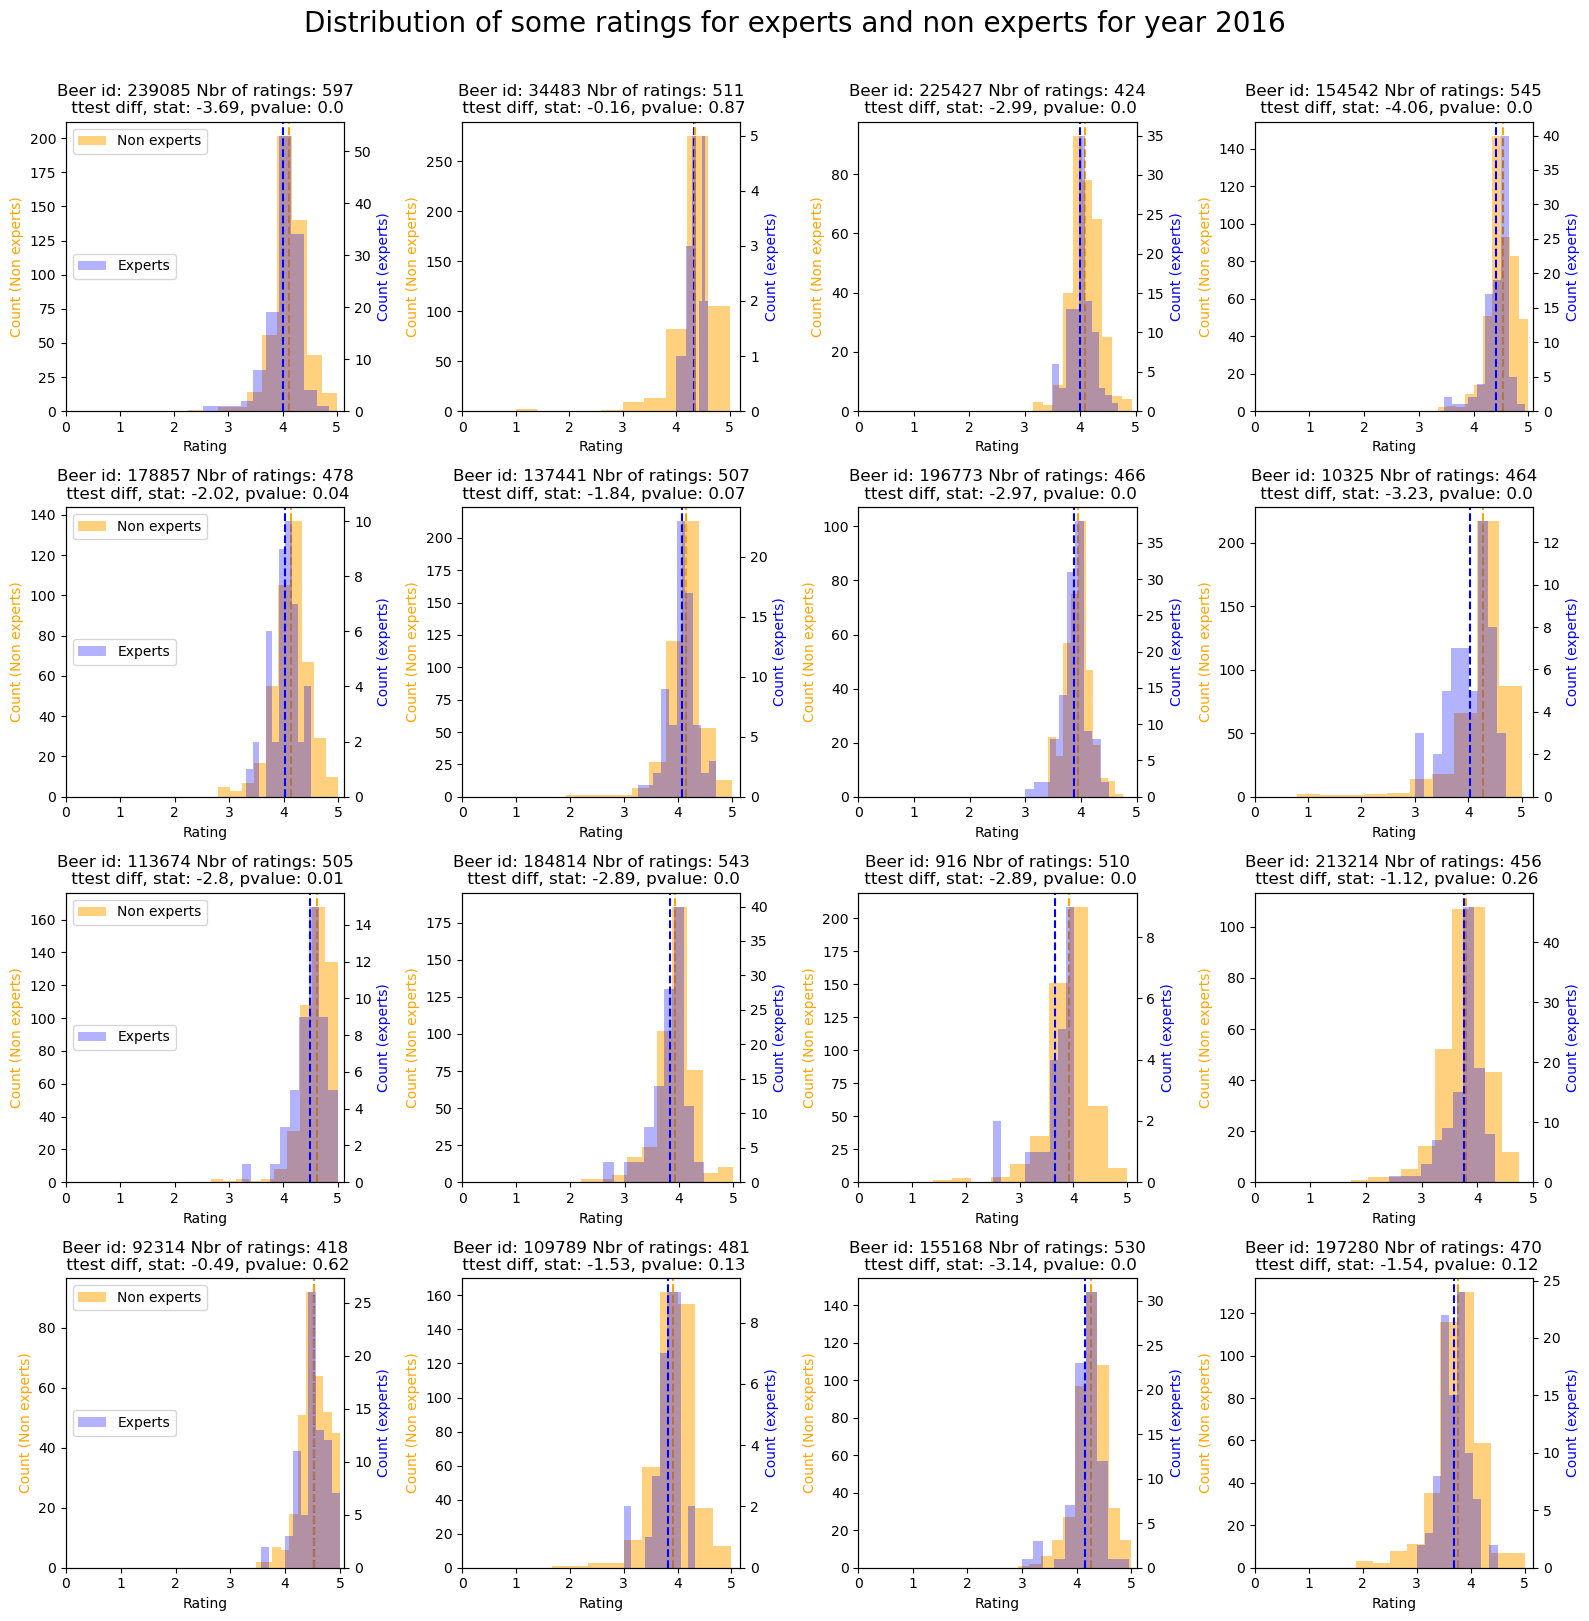

In [161]:
nrows=4
fig,ax=plt.subplots(nrows,nrows)
fig.set_size_inches(4*nrows,4*nrows)
minimum_number_of_ratings=400
bins=10
for i in range(nrows*nrows):
    np.random.seed(i)
    beer_id_to_study=np.random.choice(df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>minimum_number_of_ratings].index.values)
    ratings_this_beer=df_ratings_this_year.loc[df_ratings_this_year["beer_id"]==beer_id_to_study]
    ratings_this_beer_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==1]
    ratings_this_beer_non_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==0]
    while len(ratings_this_beer_experts)==0 or len(ratings_this_beer_non_experts)==0:
        beer_id_to_study=np.random.choice(df_ratings_this_year.groupby("beer_id").agg("size").loc[df_ratings_this_year.groupby("beer_id").agg("size")>minimum_number_of_ratings].index.values)
        ratings_this_beer=df_ratings_this_year.loc[df_ratings_this_year["beer_id"]==beer_id_to_study]
        ratings_this_beer_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==1]
        ratings_this_beer_non_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==0]

    
    difference_ttest=ttest_ind(ratings_this_beer_experts["rating"],ratings_this_beer_non_experts["rating"])
    ax2 = ax[i//nrows,i%nrows].twinx()
    ax2.hist(ratings_this_beer_experts["rating"],bins=bins,alpha=0.3,label="Experts",color="b")
    ax[i//nrows,i%nrows].hist(ratings_this_beer_non_experts["rating"],bins=bins,alpha=0.5,label="Non experts",color="orange")
    ax[i//nrows,i%nrows].axvline(ratings_this_beer_experts["rating"].mean(),c="b",linestyle="--")
    ax[i//nrows,i%nrows].axvline(ratings_this_beer_non_experts["rating"].mean(),c="orange",linestyle="--")
    
    ax[i//nrows,i%nrows].set_xticks(np.arange(0,6,1),labels=np.arange(0,6,1))
    ax[i//nrows,i%nrows].set_xlabel("Rating")
    ax[i//nrows,i%nrows].set_ylabel("Count (Non experts)",color="orange")
    ax2.set_ylabel("Count (experts)",color="b")
    ax[i//nrows, i%nrows].set_title(f"Beer id: {beer_id_to_study} Nbr of ratings: {ratings_this_beer.shape[0]}\n ttest diff, stat: {np.round(difference_ttest[0], 2)}, pvalue: {np.round(difference_ttest[1], 2)}")
    if i%nrows==0:
        ax[i//nrows,i%nrows].legend()
        ax2.legend(loc='center left')



fig.suptitle(f"Distribution of some ratings for experts and non experts for year {YEAR}",y=1.01,fontsize=20)
fig.tight_layout()
plt.show()


We see that for many beers, the difference of ratings is significant. Plus, experts seem not very likely to give excelent ratings (4.5 to 5)

We should investigate the last point for later

#### 1.2.g) Ratings at the beginning of a beer

In [51]:
def make_analysis_one_beer(beer_id_to_study):
    ratings_this_beer=df_ratings_stats.loc[df_ratings_stats["beer_id"]==beer_id_to_study]
    ratings_this_beer.sort_values(by="date",inplace=True)
    ratings_this_beer["is_expert"]=ratings_this_beer[["user_id","year"]].apply(lambda x: 1 if x["user_id"] in experts_dict[x["year"]] else 0,axis=1)
    # group ratings by date and count the number of ratings for each date
    ratings_by_date = ratings_this_beer.groupby(['date','is_expert']).size().reset_index(name='count')


    # calculate the cumulative sum of the ratings
    ratings_by_date['cumulative_count'] = ratings_by_date['count'].cumsum()

    fig,ax=plt.subplots(1,2)
    fig.set_size_inches(20,10)
    # plot the evolution of the cumulative number of ratings over time
    n=0
    old_date=ratings_by_date["date"].values[0]
    for i,rating in ratings_by_date.iterrows():
        if rating["is_expert"]==1:
            c="b"
            markersize=2
        else:
            c="orange"
            markersize=1
        ax[0].plot([old_date,rating["date"]],[n,rating["cumulative_count"]],marker="o",c=c,markersize=markersize)
        n=rating["cumulative_count"]
        old_date=rating["date"]
        
    fontsize_x_tiks=16
    ax[0].set_xlabel('Date',fontsize=fontsize_x_tiks)
    ax[0].set_ylabel('Cumulative number of ratings',fontsize=fontsize_x_tiks)
    last_year=ratings_this_beer["year"].values[-1]
    first_year=ratings_this_beer["year"].values[0]
    xticks = np.array([pd.to_datetime(str(year), format='%Y') for year in range(first_year,last_year+1)])
    if len(xticks)>5:
        indexs_x_ticks=np.arange(0,len(xticks),len(xticks)//5)
        indexs_x_ticks=np.floor(indexs_x_ticks).astype(int)
        ax[0].set_xticks(xticks[indexs_x_ticks])
    else:
        ax[0].set_xticks(xticks)
    ratings_this_beer.groupby("year")["rating"].agg("mean").plot(ax=ax[1],marker="o",c="r",markersize=5,linestyle="--",label="mean rating experts")
    ax[1].set_xlabel('Year',fontsize=fontsize_x_tiks)
    ax[1].set_ylabel('Mean rating of the year',fontsize=fontsize_x_tiks)
    fig.suptitle(f'Evolution of cumulative number of ratings over time for beer {beer_id_to_study}',fontsize=20)
    fig.tight_layout()
    plt.show()

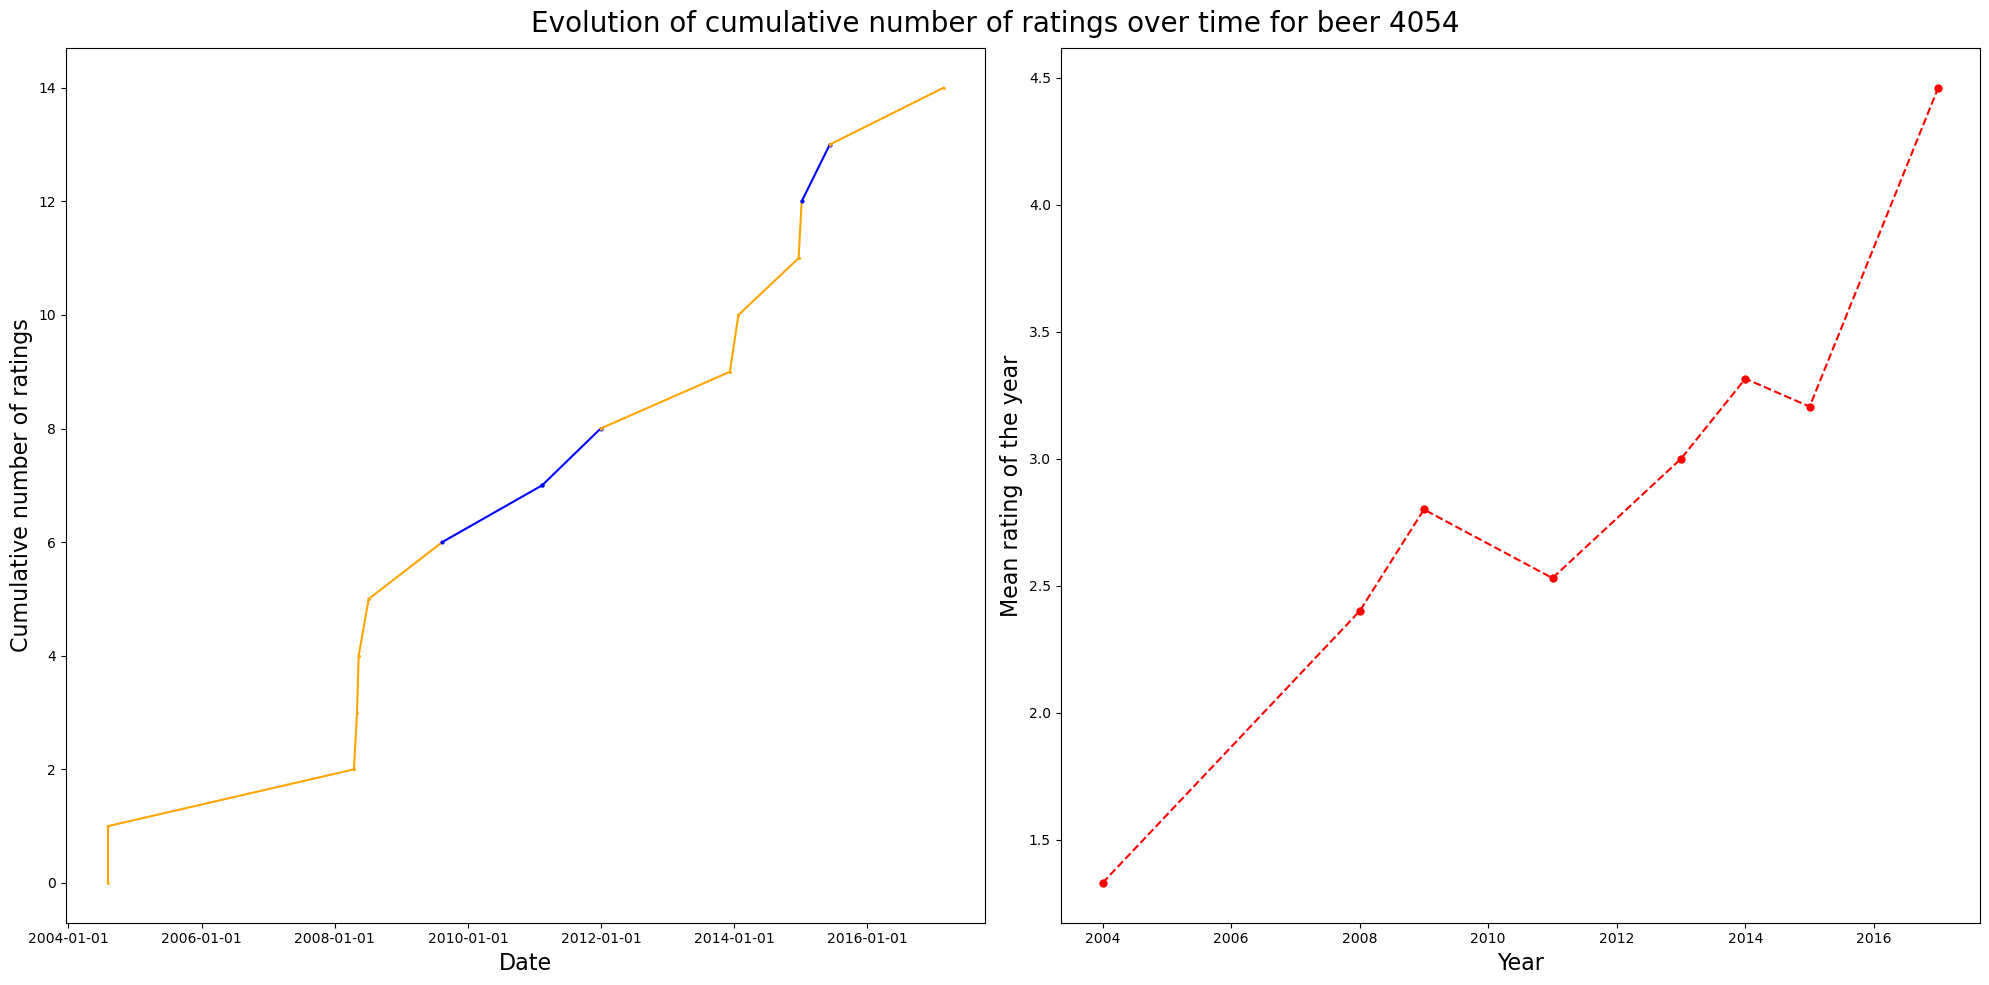

In [185]:
make_analysis_one_beer(4054)

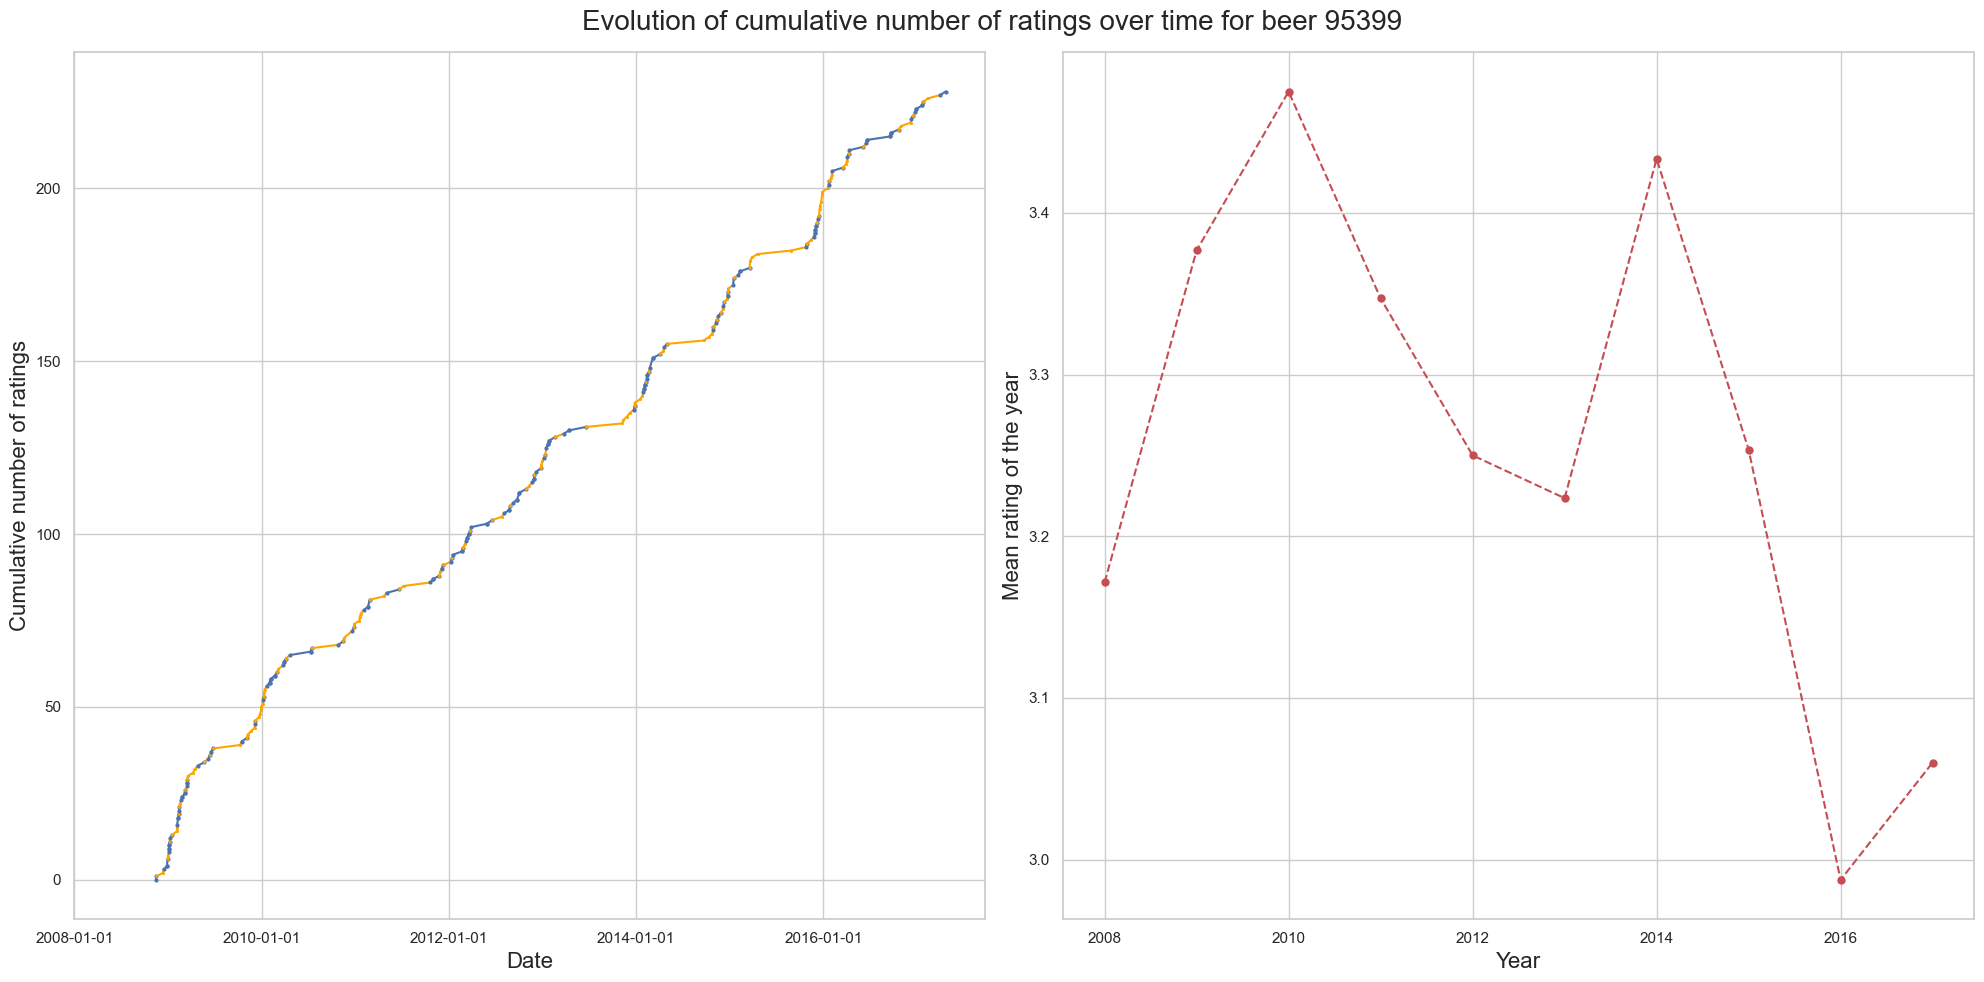

In [52]:
make_analysis_one_beer(95399)

!!! Analysis to be done

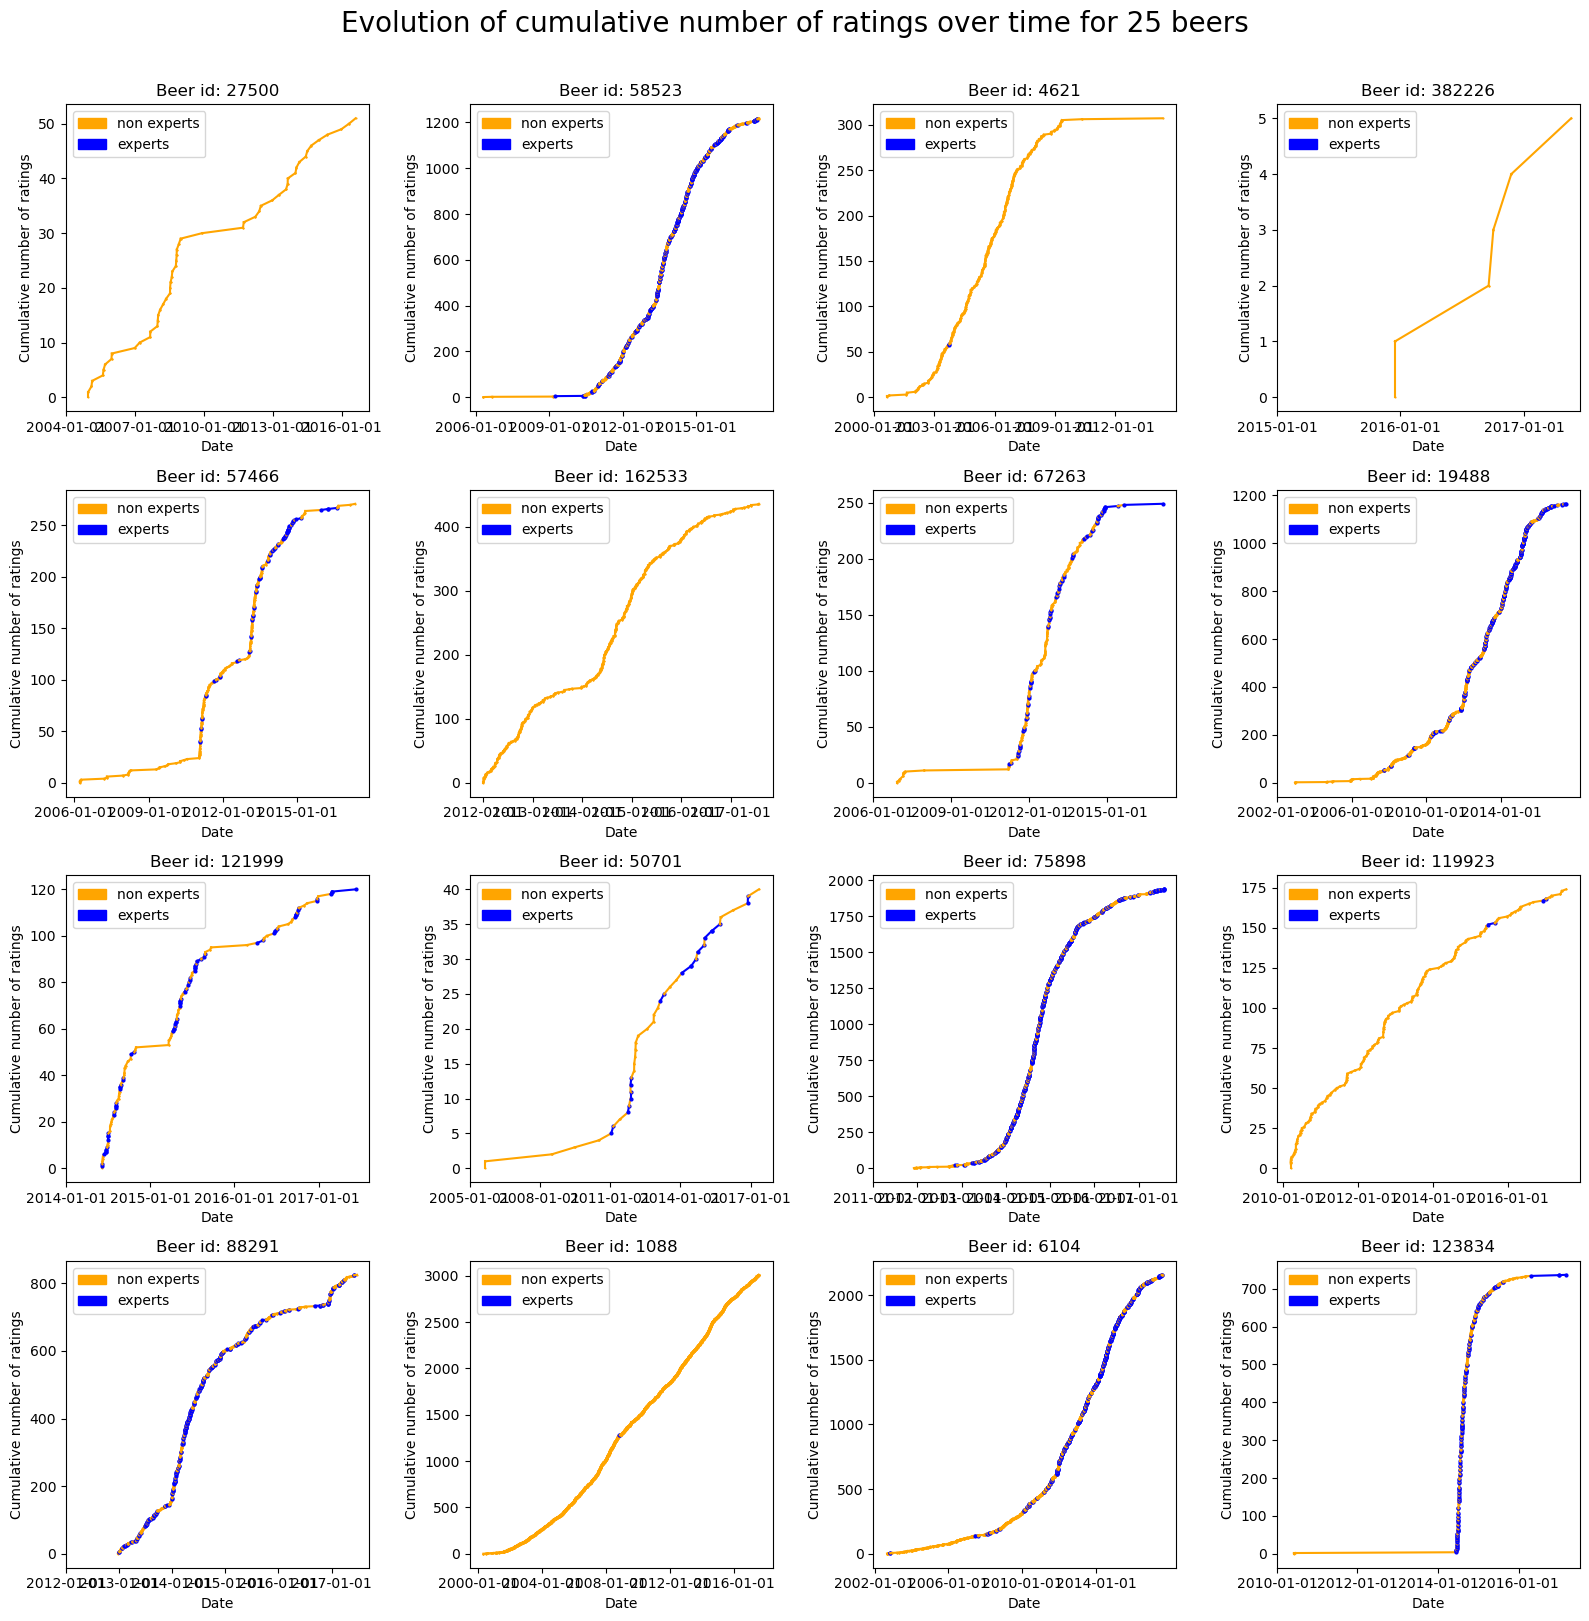

In [194]:
n_rows=4

fig,ax=plt.subplots(n_rows,n_rows)
fig.set_size_inches(4*n_rows,4*n_rows)
for k in range(n_rows*n_rows):
    if k==0:
        beer_id_to_study=27500
    else:
        beer_id_to_study=df_ratings_stats.sample(1)["beer_id"].values[0]
    ratings_this_beer=df_ratings_stats.loc[df_ratings_stats["beer_id"]==beer_id_to_study]
    ratings_this_beer.sort_values(by="date",inplace=True)
    ratings_this_beer["is_expert"]=ratings_this_beer[["user_id","year"]].apply(lambda x: 1 if x["user_id"] in experts_dict[x["year"]] else 0,axis=1)
    # group ratings by date and count the number of ratings for each date
    ratings_by_date = ratings_this_beer.groupby(['date','is_expert']).size().reset_index(name='count')


    # calculate the cumulative sum of the ratings
    ratings_by_date['cumulative_count'] = ratings_by_date['count'].cumsum()

    # plot the evolution of the cumulative number of ratings over time
    n=0
    old_date=ratings_by_date["date"].values[0]
   
    for i,rating in ratings_by_date.iterrows():
       
        if rating["is_expert"]==1:
            c="b"
            markersize=2
            
        else:
            c="orange"
            markersize=0.5
            
        ax[k//n_rows,k%n_rows].plot([old_date,rating["date"]],[n,rating["cumulative_count"]],marker="o",c=c,markersize=markersize)
       
        n=rating["cumulative_count"]
        old_date=rating["date"]
    ax[k//n_rows,k%n_rows].set_xlabel('Date')
    ax[k//n_rows,k%n_rows].set_ylabel('Cumulative number of ratings')
    last_year=ratings_this_beer["year"].values[-1]
    first_year=ratings_this_beer["year"].values[0]
    xticks = np.array([pd.to_datetime(str(year), format='%Y') for year in range(first_year,last_year+1)])
    if len(xticks)>4:
        indexs_x_ticks=np.arange(0,len(xticks),len(xticks)//4)
        indexs_x_ticks=np.floor(indexs_x_ticks).astype(int)
        ax[k//n_rows,k%n_rows].set_xticks(xticks[indexs_x_ticks])
    else:
        ax[k//n_rows,k%n_rows].set_xticks(xticks)
    ax[k//n_rows,k%n_rows].set_title(f'Beer id: {beer_id_to_study}')
    red_patch = mpatches.Patch(color='orange', label='non experts')
    blue_patch = mpatches.Patch(color='blue', label='experts')
    ax[k//n_rows,k%n_rows].legend(handles=[red_patch, blue_patch])

fig.suptitle(f'Evolution of cumulative number of ratings over time for 25 beers',y=1.01,fontsize=20)
fig.tight_layout()
plt.show()

#### 1.2.h) Try to find a beer which have been rated by expert and casual stricly at different years in order to identify if an expert tends to influence the ratings or not

Step 1: Find all beers which have been rated by both casual and expert

In [14]:

# Retrieve the ids of all expert user
expert_user_id = df_ratings_stat_expert[df_ratings_stat_expert.is_expert].user_id
# Separate ratings in expert and casual
df_expert_ratings = df_ratings_stats[df_ratings_stats['user_id'].isin(expert_user_id)]
df_casual_ratings = df_ratings_stats[~df_ratings_stats['user_id'].isin(expert_user_id)]

# Find all beer that has been rated at least once by an expert
beer_rated_by_expert = df_expert_ratings['beer_id'].unique()
# Find all beer that has been rated at least once by a casual
beer_rated_by_casual = df_casual_ratings['beer_id'].unique()

print(f'Total of different beer rated on both websites : {len(df_ratings_stats.beer_id.unique())}')
print(f'expert have rated {len(beer_rated_by_expert)} different beers')
print(f'casual user have rated {len(beer_rated_by_casual)} different beers')

beer_ids_rated_by_both = list(set(beer_rated_by_casual).intersection(set(beer_rated_by_expert)))
print(f'intersection, number of beers which have been rated by casual and expert : {len(beer_ids_rated_by_both)}')

Total of different beer rated on both websites : 447151
expert have rated 403763 different beers
casual user have rated 324774 different beers
intersection, number of beers which have been rated by casual and expert : 281386


Step 2: Find all beers which have been rated by an expert and a casual not the same year

In [15]:
# Only take beers which have been rated by both
beer_rated_by_expert_filtered = df_expert_ratings[df_expert_ratings['beer_id'].isin(beer_ids_rated_by_both)]
beer_rated_by_casual_filtered = df_casual_ratings[df_casual_ratings['beer_id'].isin(beer_ids_rated_by_both)]

# Select only the useful features for the task
beer_rated_by_expert_compact = beer_rated_by_expert_filtered[['beer_id', 'rating', 'year']]
beer_rated_by_casual_compact = beer_rated_by_casual_filtered[['beer_id', 'rating', 'year']]

# Add is_expert column to dataframe
beer_rated_by_expert_compact.loc[:, 'is_expert'] = True
beer_rated_by_casual_compact.loc[:, 'is_expert'] = False

# Concatenate the ratings of expert and casual
beer_rated_by_expert_casual = pd.concat([beer_rated_by_expert_compact, beer_rated_by_casual_compact])
# Only take care of data after 2002
beer_rated_by_expert_casual = beer_rated_by_expert_casual.query('year > 2002')

In [27]:
beer_rated_by_expert_casual

,beer_id,rating,year,is_expert
1,120824,3.56,2015,True
2,47581,4.50,2011,True
3,93113,3.75,2013,True
4,875,3.81,2015,True
5,52610,3.50,2012,True
...,...,...,...,...
6310848,166447,4.80,2012,False
6310849,85893,0.50,2008,False
6310850,77389,3.90,2008,False
6310851,5423,2.70,2008,False


In [18]:
# Search for all beers which have been rated by casual and expert in a same year
# Group by 'beer_id', 'year', and 'is_expert' and count the occurrences
grouped_df = beer_rated_by_expert_casual.groupby(['beer_id', 'year', 'is_expert']).size().reset_index(name='count')
filtered_df = grouped_df[(grouped_df['count'] > 1) & ((grouped_df['is_expert'] == True) | (grouped_df['is_expert'] == False))]
beer_ids_to_remove = filtered_df['beer_id'].unique().tolist()


# Remove these beers
beer_rated_by_expert_casual_different_year = beer_rated_by_expert_casual[~beer_rated_by_expert_casual['beer_id'].isin(beer_ids_to_remove)]


In [28]:
grouped_df

,beer_id,year,is_expert,count
0,1,2003,False,87
1,1,2003,True,17
2,1,2004,False,96
3,1,2004,True,22
4,1,2005,False,94
...,...,...,...,...
1853988,536150,2017,True,1
1853989,536273,2017,False,1
1853990,536273,2017,True,1
1853991,536380,2017,False,1


In [26]:
# Find the beer which has been rated the most different years by either a casual or expert

# Group by 'beer_id' and count the number of unique years
beer_years_count = beer_rated_by_expert_casual_different_year.groupby('beer_id')['year'].nunique()

# Find the beer_id with the maximum number of unique years
most_rated_beer_id = 88291#beer_years_count.idxmax()

# See if it is relevant to take this beer
beer_rated_by_expert_casual_different_year[beer_rated_by_expert_casual_different_year['beer_id'] == most_rated_beer_id]

,beer_id,rating,year,is_expert


In [21]:
most_rated_beer_name = df_ratings_stats[df_ratings_stats['beer_id'] == most_rated_beer_id].iloc[0][0]

print(f'Beer id with the most ratings over the years by expert and casual where non of them rated it the same year: {most_rated_beer_id}')
print(f'Beer name : {most_rated_beer_name}')

Beer id with the most ratings over the years by expert and casual where non of them rated it the same year: 17856
Beer name : Willimantic Carrier's Credo Cream Ale


In [22]:
df_most_rated_beer = beer_rated_by_expert_casual_different_year[beer_rated_by_expert_casual_different_year['beer_id'] 
                                                                == most_rated_beer_id].groupby(['year', 'is_expert'])['rating'].mean().reset_index()

In [37]:
df_ratings_stats["is_expert"]=df_ratings_stats[["user_id","year"]].apply(lambda x: 1 if x["user_id"] in experts_dict[x["year"]] else 0,axis=1)

In [49]:
beer_id_to_study=95399
ratings_this_beer=df_ratings_stats.loc[df_ratings_stats["beer_id"]==beer_id_to_study]
print(ratings_this_beer.shape[0])
ratings_this_beer_experts=ratings_this_beer.groupby(["year","is_expert"])["rating"].agg("mean").reset_index()
#ratings_this_beer_non_experts=ratings_this_beer.loc[ratings_this_beer["is_expert"]==0].groupby("year")["rating"].agg("mean").reset_index()

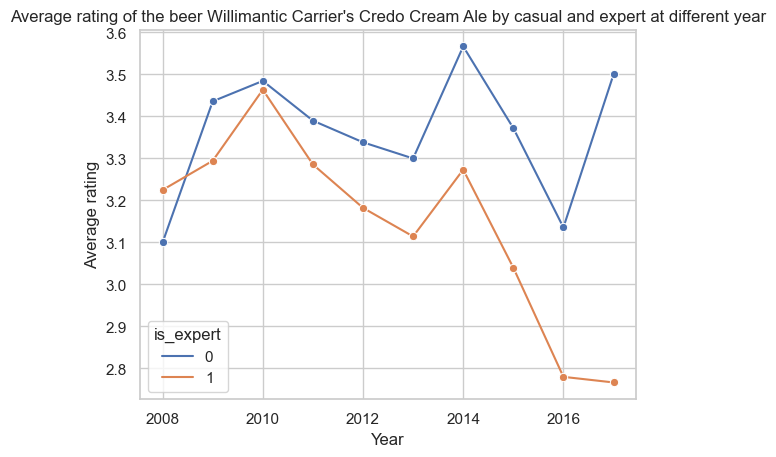

In [50]:
# Plot version 1
sns.set(style="whitegrid")
sns.lineplot(data=ratings_this_beer_experts, x='year', y='rating', hue='is_expert', marker='o')
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title(f'Average rating of the beer {most_rated_beer_name} by casual and expert at different year')
plt.show()